
#**Case Study Title: Audience Scoring for Direct Mail Marketing**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
Sales_df=pd.read_csv('06052025_Sales_Data.csv')
Dates_df=pd.read_csv('06052025_DM_Dates.csv')
Sales_df

,Gold_Cust_ID,Post_Cd,Tran_Dt,Dept ID,Dept Name,Division,Channel,Online Store,Itm_Id,Class Code,Class Name,Brand Name,Price Paid,Units,Shipping Cost,DMCouponInd,Return_Ind
0,213,344813463,5/16/2023,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,NaN,0,0
1,213,344813463,5/16/2023,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,NaN,0,0
2,213,344813463,5/16/2023,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,NaN,0,0
3,213,344813463,5/16/2023,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,NaN,0,0
4,213,344813463,5/16/2023,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271130,37543211,273499366,4/30/2025,5518,Burlington Retail,Retail,Retail,/Not Applicable,111740,33,POWER TOOLS,/Not Applicable,39.97,1.0,NaN,0,0
271131,37544105,321193400,5/1/2025,2191,E-Commerce,Direct,Internet,NTE.com,5864861,7,AUTOMOTIVE ACCESSORIES,/Not Applicable,1129.00,1.0,41.49,0,0
271132,37545460,276042489,5/1/2025,5513,East Raleigh Retail,Retail,Retail,/Not Applicable,41911,7,AUTOMOTIVE ACCESSORIES,Northern Tool,1694.96,4.0,NaN,0,0
271133,37545460,276042489,5/1/2025,5513,East Raleigh Retail,Retail,Retail,/Not Applicable,41911,7,AUTOMOTIVE ACCESSORIES,Northern Tool,1694.96,4.0,NaN,1,0


## **Exploratory Data Analysis**

In [3]:
Dates_df

,Gold_Cust_ID,DM Mail Date
0,213,5/8/2023
1,213,9/9/2024
2,213,11/6/2023
3,213,4/8/2024
4,213,4/7/2025
...,...,...
29963,36904813,4/7/2025
29964,36905023,4/7/2025
29965,36916725,4/7/2025
29966,36924552,4/7/2025


In [4]:
print(Sales_df.info())
print(Dates_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271135 entries, 0 to 271134
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Gold_Cust_ID   271135 non-null  int64  
 1   Post_Cd        264758 non-null  object 
 2   Tran_Dt        271135 non-null  object 
 3   Dept ID        271135 non-null  int64  
 4   Dept Name      271135 non-null  object 
 5   Division       271135 non-null  object 
 6   Channel        271135 non-null  object 
 7   Online Store   271135 non-null  object 
 8   Itm_Id         271135 non-null  object 
 9   Class Code     271135 non-null  object 
 10  Class Name     271135 non-null  object 
 11  Brand Name     271135 non-null  object 
 12  Price Paid     271135 non-null  float64
 13  Units          271135 non-null  float64
 14  Shipping Cost  12732 non-null   float64
 15  DMCouponInd    271135 non-null  int64  
 16  Return_Ind     271135 non-null  int64  
dtypes: float64(3), int64(4), obje

## **Data Cleaning**

In [5]:
Sales_df.isnull().sum()

,0
Gold_Cust_ID,0
Post_Cd,6377
Tran_Dt,0
Dept ID,0
Dept Name,0
Division,0
Channel,0
Online Store,0
Itm_Id,0
Class Code,0


In [6]:
Sales_df.duplicated().sum()

np.int64(216376)

In [7]:
Sales_df.nunique()

,0
Gold_Cust_ID,10000
Post_Cd,8967
Tran_Dt,728
Dept ID,150
Dept Name,150
Division,2
Channel,4
Online Store,7
Itm_Id,11856
Class Code,110


In [8]:
Sales_df.drop_duplicates(inplace=True)

In [9]:
Sales_df.axes

[Index([     0,     10,     20,     30,     31,     60,     80,    100,    110,
           120,
        ...
        271125, 271126, 271127, 271128, 271129, 271130, 271131, 271132, 271133,
        271134],
       dtype='int64', length=54759),
 Index(['Gold_Cust_ID', 'Post_Cd', 'Tran_Dt', 'Dept ID', 'Dept Name',
        'Division', 'Channel', 'Online Store', 'Itm_Id', 'Class Code',
        'Class Name', 'Brand Name', 'Price Paid', 'Units', 'Shipping Cost',
        'DMCouponInd', 'Return_Ind'],
       dtype='object')]

In [10]:
Sales_df.shape

(54759, 17)

### **convert the object data to Datatime**

In [11]:
Dates_df['DM Mail Date'] = pd.to_datetime(Dates_df['DM Mail Date'], errors='coerce')
Dates_df.dtypes

,0
Gold_Cust_ID,int64
DM Mail Date,datetime64[ns]


In [12]:
Sales_df['Tran_Dt'] = pd.to_datetime(Sales_df['Tran_Dt'], errors='coerce')
Sales_df['Post_Cd'] = Sales_df['Post_Cd'].astype(str)
Sales_df.dtypes

,0
Gold_Cust_ID,int64
Post_Cd,object
Tran_Dt,datetime64[ns]
Dept ID,int64
Dept Name,object
Division,object
Channel,object
Online Store,object
Itm_Id,object
Class Code,object


In [13]:
print("Mean of Shipping Cost: ",Sales_df['Shipping Cost'].mean())
print("Median of Shipping Cost: ",Sales_df['Shipping Cost'].median())

Mean of Shipping Cost:  11.17155603508772
Median of Shipping Cost:  0.0


In [14]:
Sales_df['Shipping Cost'].fillna(Sales_df['Shipping Cost'].mean(),inplace=True)
Sales_df.isnull().sum()

,0
Gold_Cust_ID,0
Post_Cd,0
Tran_Dt,0
Dept ID,0
Dept Name,0
Division,0
Channel,0
Online Store,0
Itm_Id,0
Class Code,0


In [15]:
Sales_df.describe()

,Gold_Cust_ID,Tran_Dt,Dept ID,Price Paid,Units,Shipping Cost,DMCouponInd,Return_Ind
count,5.475900e+04,54759,54759.000000,54759.00000,54759.000000,54759.000000,54759.000000,54759.000000
mean,1.913001e+07,2024-04-22 22:18:02.780913152,5258.631768,75.15660,1.251694,11.171556,0.133932,0.034040
min,2.130000e+02,2023-05-01 00:00:00,2101.000000,-9999.99000,-33.000000,0.000000,0.000000,0.000000
25%,5.921431e+06,2023-10-19 00:00:00,5506.000000,6.99000,1.000000,11.171556,0.000000,0.000000
50%,1.828684e+07,2024-04-23 00:00:00,5563.000000,19.97000,1.000000,11.171556,0.000000,0.000000
75%,3.275347e+07,2024-10-28 00:00:00,5650.000000,54.44000,1.000000,11.171556,0.000000,0.000000
max,3.754594e+07,2025-05-01 00:00:00,5695.000000,16999.99000,144.000000,1387.410000,1.000000,1.000000
std,1.310654e+07,NaN,994.488319,339.77446,1.787558,14.789561,0.340583,0.181334


In [16]:
Dates_df.describe()

,Gold_Cust_ID,DM Mail Date
count,2.996800e+04,29968
mean,1.340509e+07,2024-03-17 09:12:18.067271680
min,2.130000e+02,2023-05-08 00:00:00
25%,2.750468e+06,2023-09-05 00:00:00
50%,1.207334e+07,2024-04-08 00:00:00
75%,2.292054e+07,2024-09-09 00:00:00
max,3.698135e+07,2025-04-07 00:00:00
std,1.050861e+07,NaN


In [17]:
Sales_df.dtypes

,0
Gold_Cust_ID,int64
Post_Cd,object
Tran_Dt,datetime64[ns]
Dept ID,int64
Dept Name,object
Division,object
Channel,object
Online Store,object
Itm_Id,object
Class Code,object


## **Data Visualization with single column**


Sales_Data.csv Value Counts (Top 10):

Dept Name:


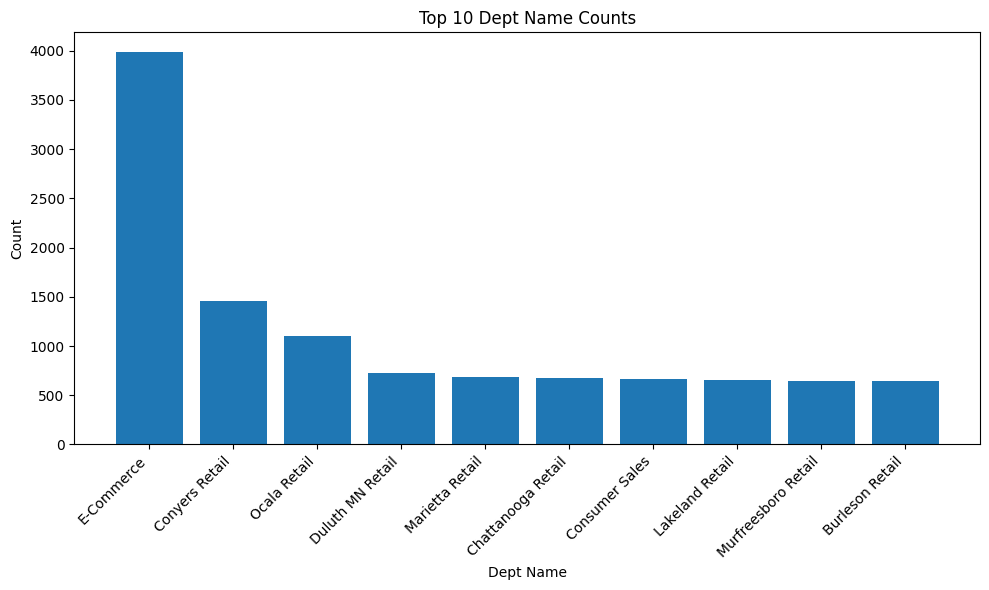


Division:


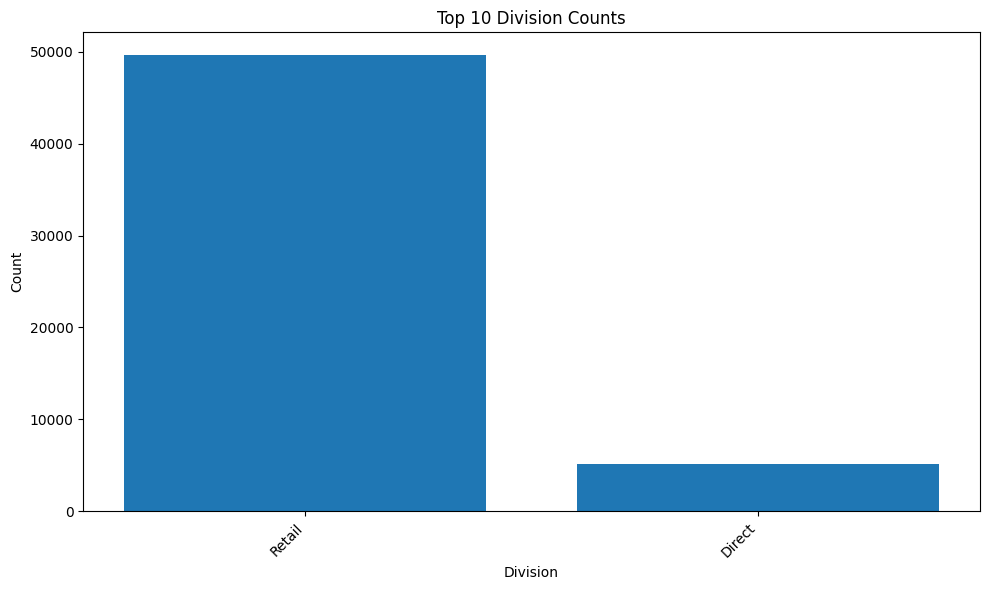


Channel:


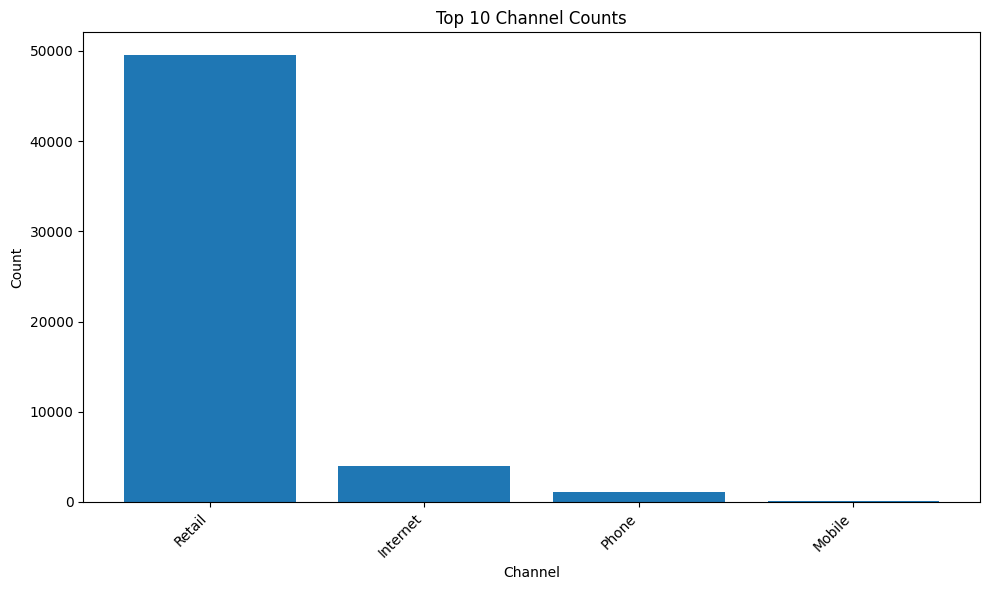


Online Store:


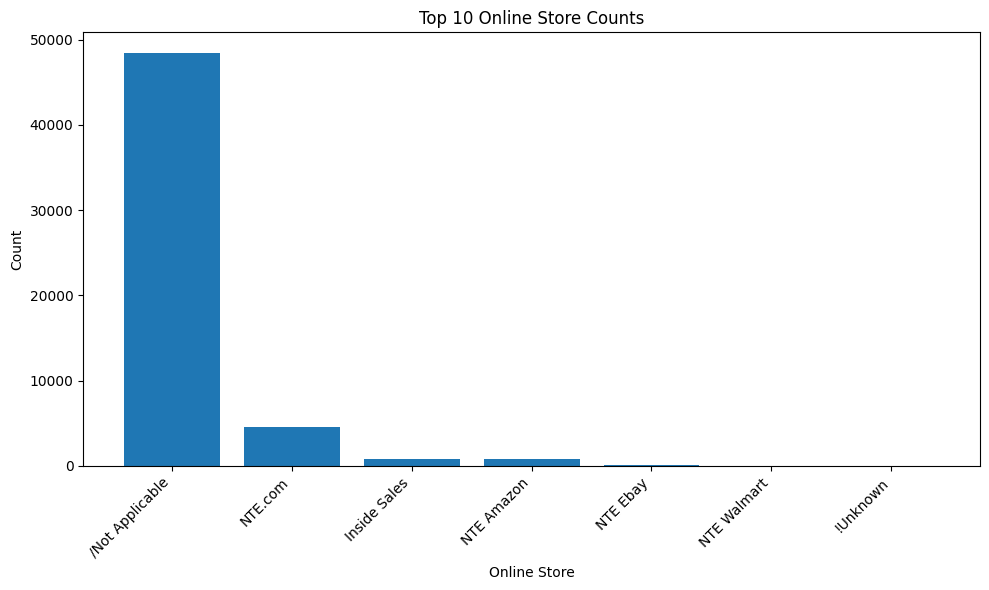


Class Name:


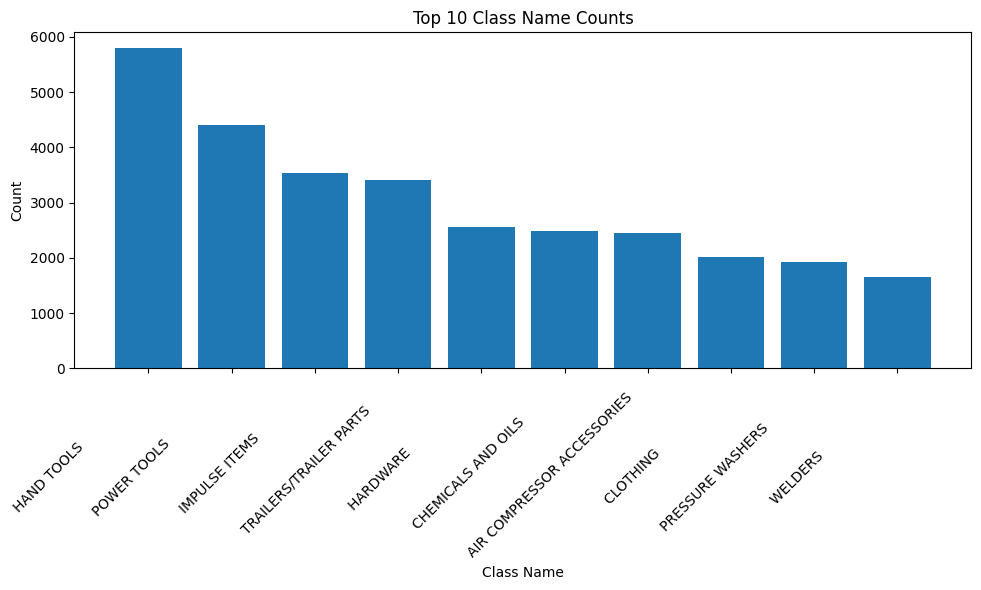


Brand Name:


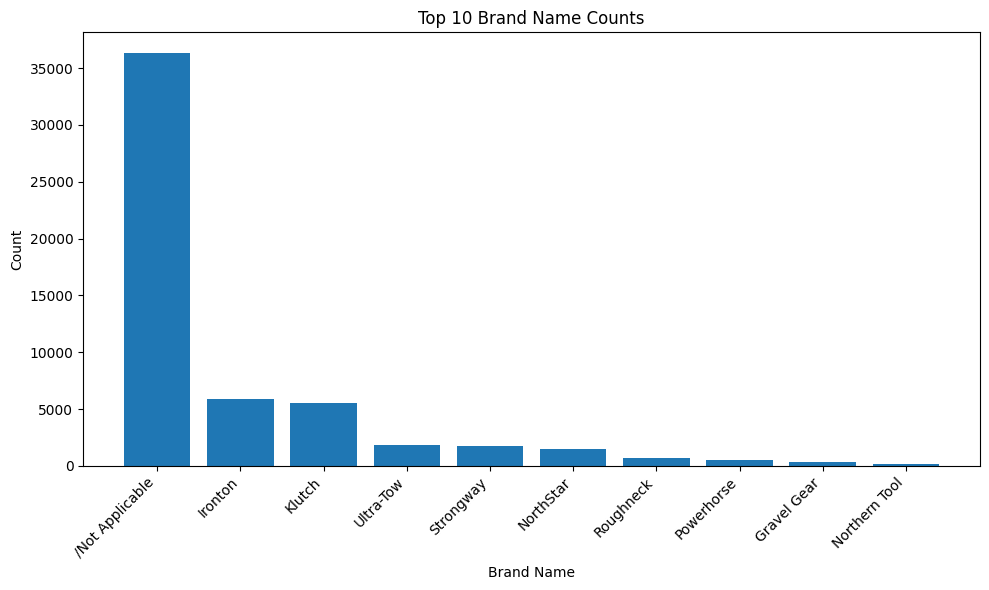

In [18]:
print("\nSales_Data.csv Value Counts (Top 10):")
for col in ['Dept Name', 'Division', 'Channel', 'Online Store', 'Class Name', 'Brand Name']:
    print(f"\n{col}:")
    top_10_counts = Sales_df[col].value_counts().head(10)
    plt.figure(figsize=(10, 6)) # Create a new figure for each plot
    plt.bar(top_10_counts.index, top_10_counts.values)
    plt.title(f'Top 10 {col} Counts')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

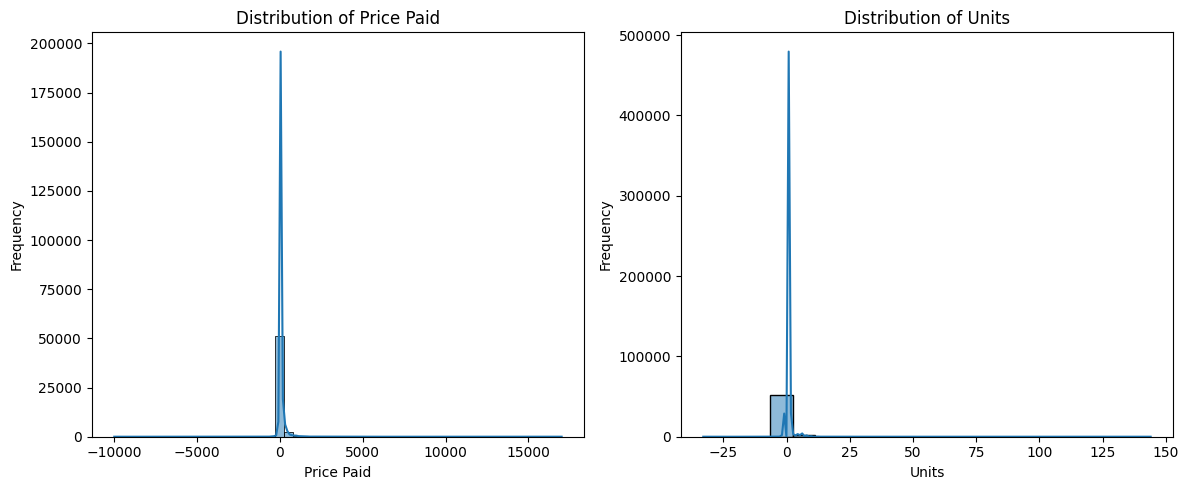

In [19]:
# Histograms for 'Price Paid' and 'Units'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Sales_df['Price Paid'].dropna(), bins=50, kde=True)
plt.title('Distribution of Price Paid')
plt.xlabel('Price Paid')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Sales_df['Units'].dropna(), bins=20, kde=True)
plt.title('Distribution of Units')
plt.xlabel('Units')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Data Visualization with two Columns**

In [20]:
# Group by transaction date and calculate total price paid and units
sales_over_time = Sales_df.groupby('Tran_Dt')[['Price Paid', 'Units']].sum().reset_index()
sales_over_time

,Tran_Dt,Price Paid,Units
0,2023-05-01,3820.530000,74.0
1,2023-05-02,8251.210000,142.0
2,2023-05-03,8335.870000,72.0
3,2023-05-04,6475.920000,80.0
4,2023-05-05,2562.840000,52.0
...,...,...,...
723,2025-04-27,3899.460000,86.0
724,2025-04-28,6500.490001,111.0
725,2025-04-29,4241.470000,94.0
726,2025-04-30,6680.600000,103.0


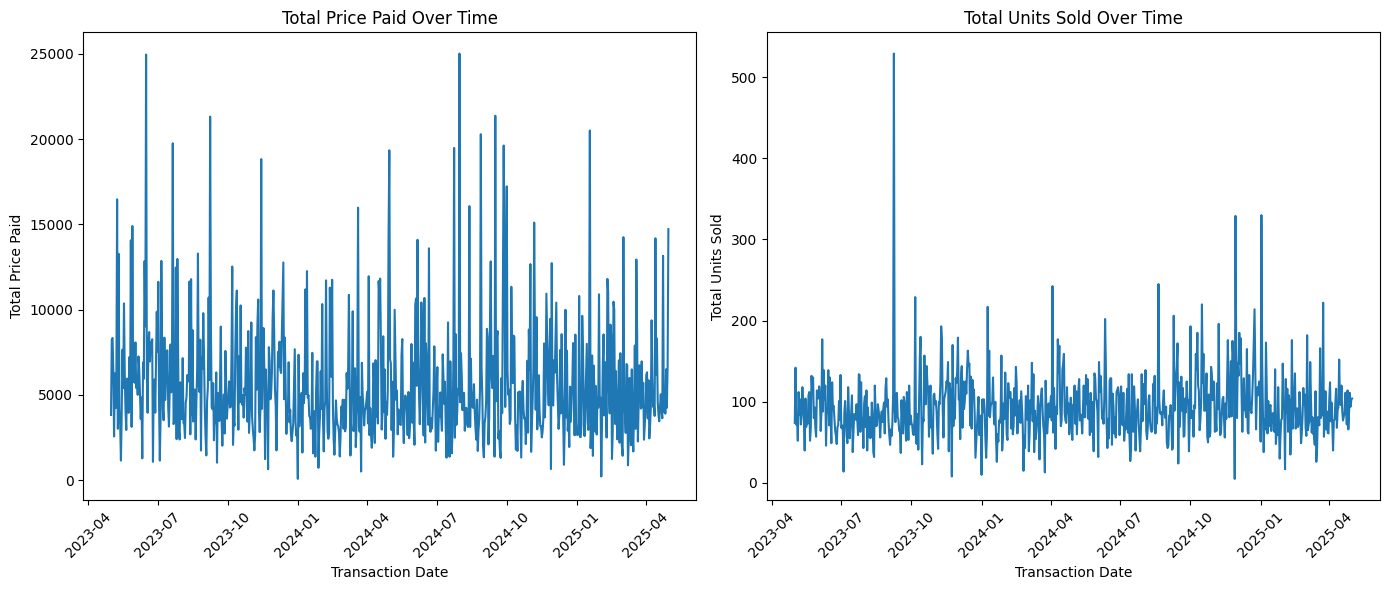

In [21]:
# Visualize sales trends over time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=sales_over_time, x='Tran_Dt', y='Price Paid')
plt.title('Total Price Paid Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Price Paid')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=sales_over_time, x='Tran_Dt', y='Units')
plt.title('Total Units Sold Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# Analyze sales by Channel
sales_by_channel = Sales_df.groupby('Channel')['Price Paid'].sum().reset_index()
sales_by_channel

,Channel,Price Paid
0,Internet,1.066056e+06
1,Mobile,3.544730e+03
2,Phone,2.419144e+05
3,Retail,2.803985e+06


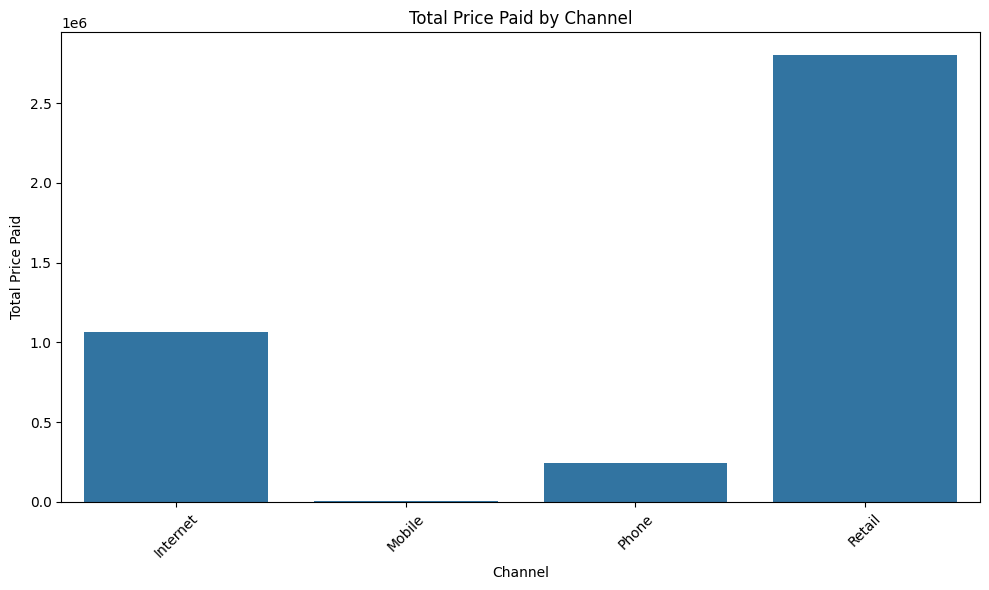

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_channel, x='Channel', y='Price Paid')
plt.title('Total Price Paid by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Analyze sales by Division
sales_by_division = Sales_df.groupby('Division')['Price Paid'].sum().reset_index()
sales_by_division

,Division,Price Paid
0,Direct,1.307970e+06
1,Retail,2.807530e+06


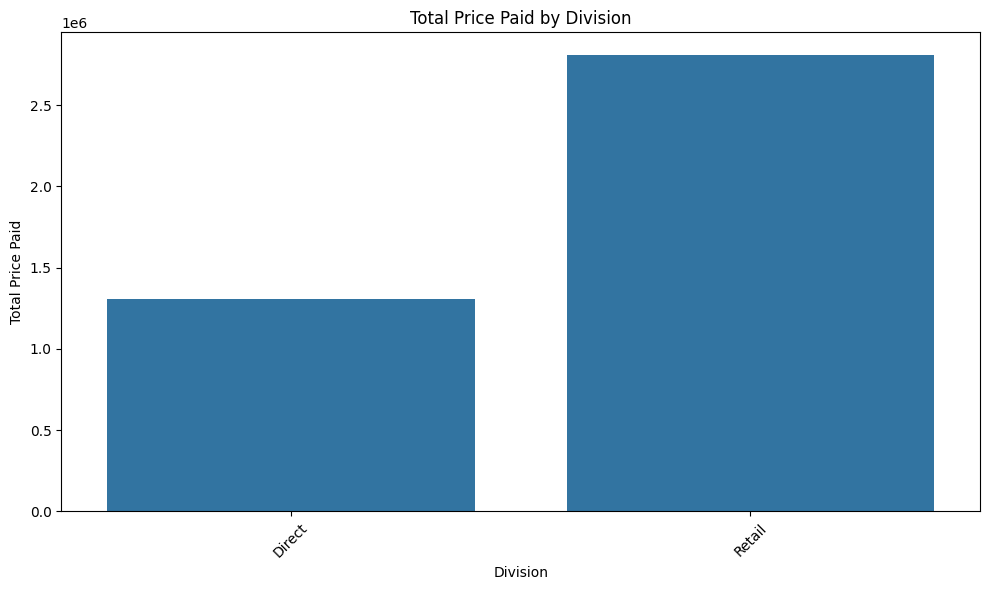

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_division, x='Division', y='Price Paid')
plt.title('Total Price Paid by Division')
plt.xlabel('Division')
plt.ylabel('Total Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Group by 'Dept Name' and calculate total price paid and units
sales_by_department = Sales_df.groupby('Dept Name')[['Price Paid', 'Units']].sum().reset_index()

In [27]:
# Sort by total price paid and display top 10 departments
top_10_revenue_departments = sales_by_department.sort_values(by='Price Paid', ascending=False).head(10)
print("Top 10 Departments by Total Revenue:")
display(top_10_revenue_departments)

Top 10 Departments by Total Revenue:


,Dept Name,Price Paid,Units
38,E-Commerce,1.064622e+06,5915.0
19,Bus to Bus Sales,1.971518e+05,1211.0
111,Odessa Retail,7.601413e+04,747.0
108,North Midland Retail,5.062689e+04,769.0
53,Grand Prairie Retail,5.021415e+04,697.0
29,Conyers Retail,4.875858e+04,1755.0
34,Denton Retail,4.459278e+04,557.0
16,Burleson Retail,4.455192e+04,847.0
60,Houston-Gulf Freeway Retail,4.388297e+04,762.0
28,Consumer Sales,3.930975e+04,651.0


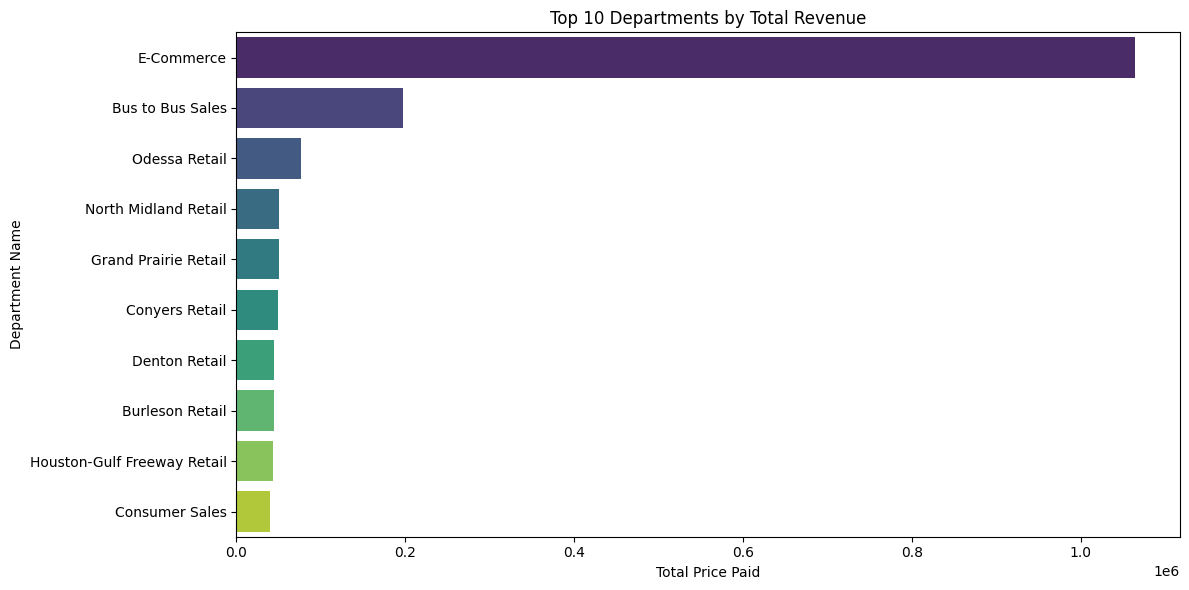

In [28]:
# Visualize top 10 departments by revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_revenue_departments, x='Price Paid', y='Dept Name', palette='viridis')
plt.title('Top 10 Departments by Total Revenue')
plt.xlabel('Total Price Paid')
plt.ylabel('Department Name')
plt.tight_layout()
plt.show()

In [29]:
# Sort by total units sold and display top 10 departments
top_10_units_departments = sales_by_department.sort_values(by='Units', ascending=False).head(10)
print("\nTop 10 Departments by Total Units Sold:")
display(top_10_units_departments)


Top 10 Departments by Total Units Sold:


,Dept Name,Price Paid,Units
38,E-Commerce,1.064622e+06,5915.0
29,Conyers Retail,4.875858e+04,1755.0
110,Ocala Retail,2.717839e+04,1449.0
19,Bus to Bus Sales,1.971518e+05,1211.0
42,El Paso Retail,2.244786e+04,1125.0
86,Marietta Retail,3.511488e+04,882.0
37,Duluth MN Retail,3.333268e+04,861.0
16,Burleson Retail,4.455192e+04,847.0
24,Chattanooga Retail,3.052109e+04,828.0
75,Lakeland Retail,1.802721e+04,824.0


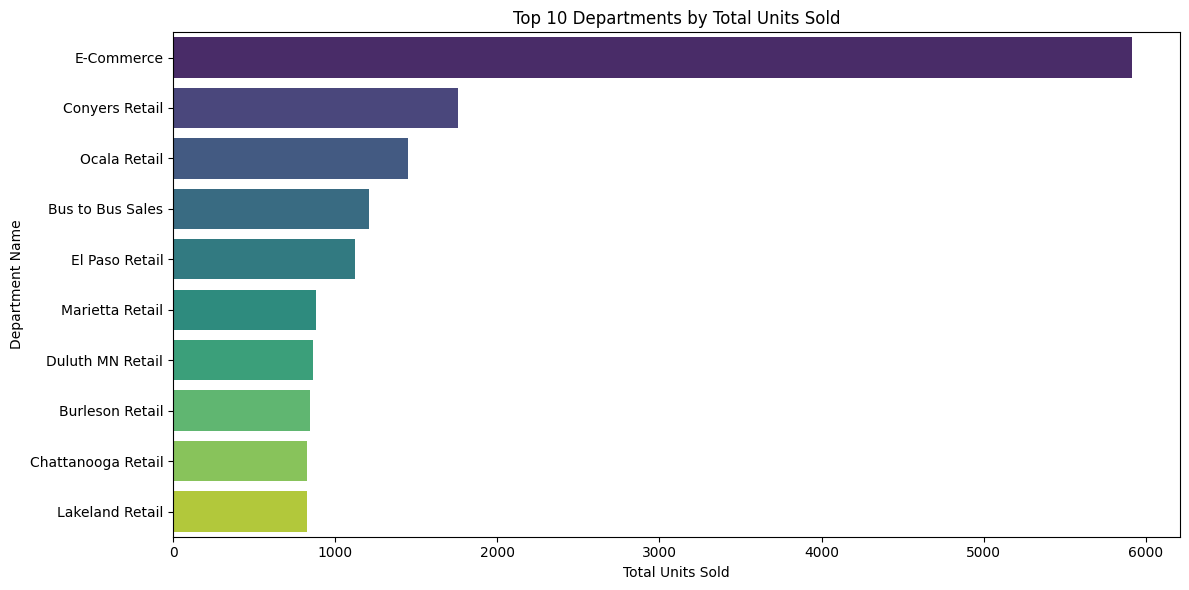

In [30]:
# Visualize top 10 departments by units sold
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_units_departments, x='Units', y='Dept Name', palette='viridis')
plt.title('Top 10 Departments by Total Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Department Name')
plt.tight_layout()
plt.show()

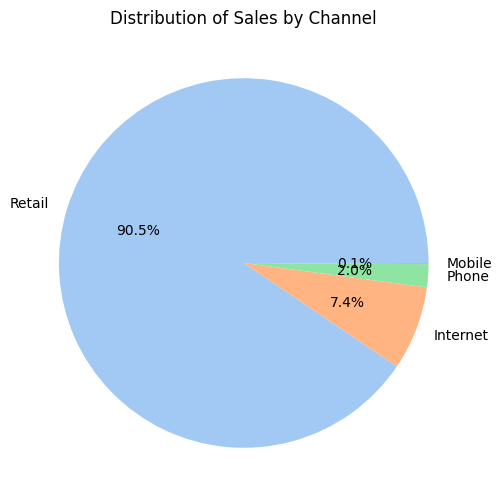

In [31]:
# Pie chart for 'Channel' distribution
channel_counts = Sales_df['Channel'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sales by Channel')
plt.show()

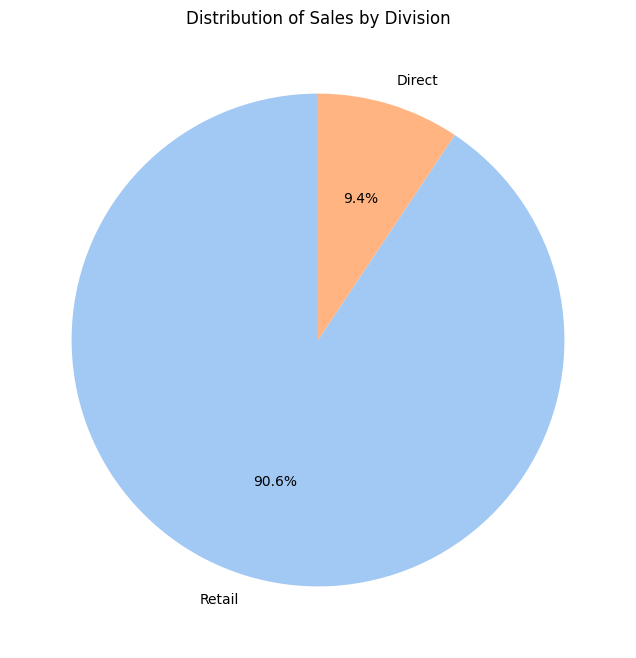

In [32]:
# Pie chart for 'Division' distribution
division_counts = Sales_df['Division'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(division_counts, labels=division_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sales by Division')
plt.show()

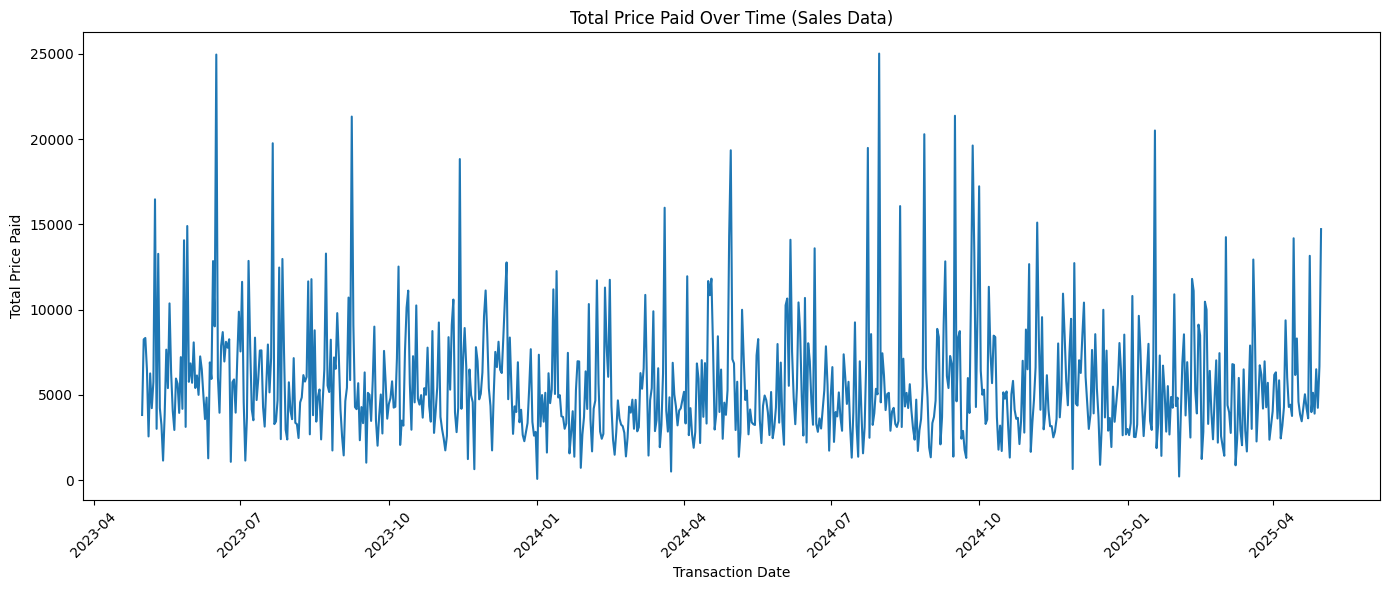

In [33]:
# Group by transaction date and calculate total price paid and units
# Ensure 'Tran_Dt' is in datetime format
Sales_df['Tran_Dt'] = pd.to_datetime(Sales_df['Tran_Dt'], errors='coerce')
sales_over_time_sales_df = Sales_df.groupby('Tran_Dt')[['Price Paid', 'Units']].sum().reset_index()

# Line chart for total 'Price Paid' over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time_sales_df, x='Tran_Dt', y='Price Paid')
plt.title('Total Price Paid Over Time (Sales Data)')
plt.xlabel('Transaction Date')
plt.ylabel('Total Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


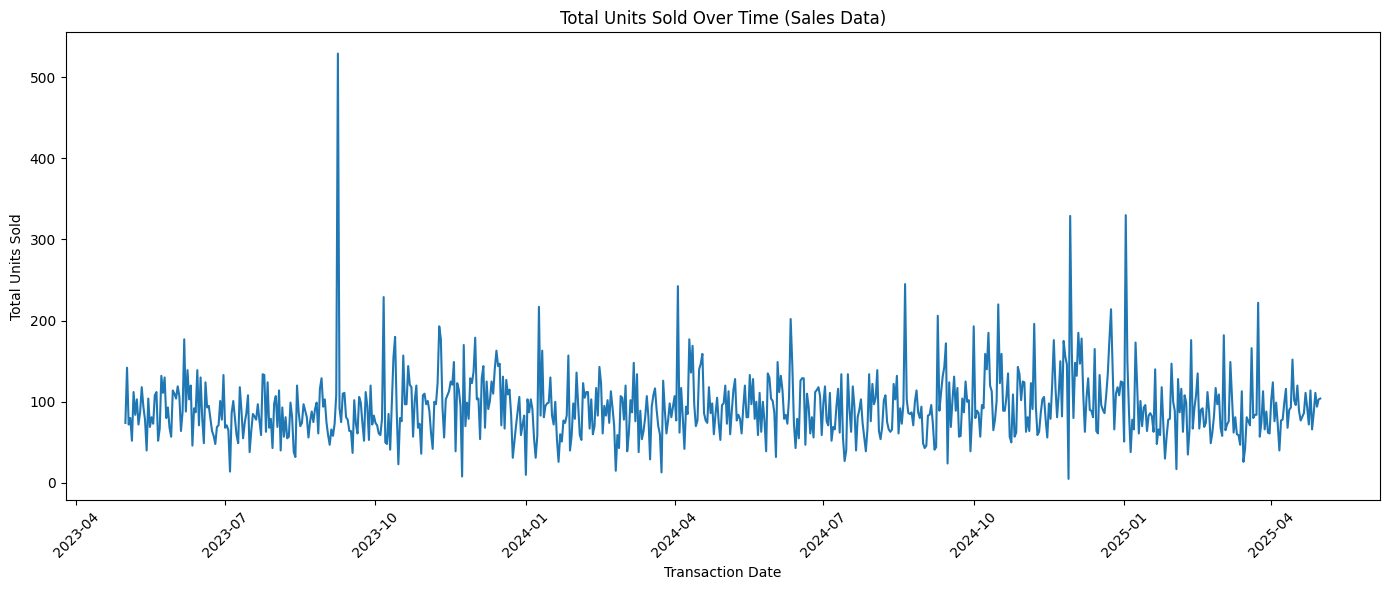

In [34]:
# Line chart for total 'Units' sold over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_over_time_sales_df, x='Tran_Dt', y='Units')
plt.title('Total Units Sold Over Time (Sales Data)')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
%pip install squarify

In [36]:
import squarify
# Treemap
# Aggregate sales data by Department Name
treemap_data = Sales_df.groupby('Dept Name')['Price Paid'].sum().reset_index()
treemap_data

,Dept Name,Price Paid
0,Abilene Retail,17236.169993
1,Amarillo Retail,16743.810000
2,Appleton Retail,16725.290000
3,Arnold Retail,8429.770000
4,Asheville Retail,22330.299999
...,...,...
145,West Allis Retail,24387.790000
146,White Bear Lake Retail,7133.469994
147,Wichita Retail,7968.980000
148,Willowbrook Retail,17328.649995


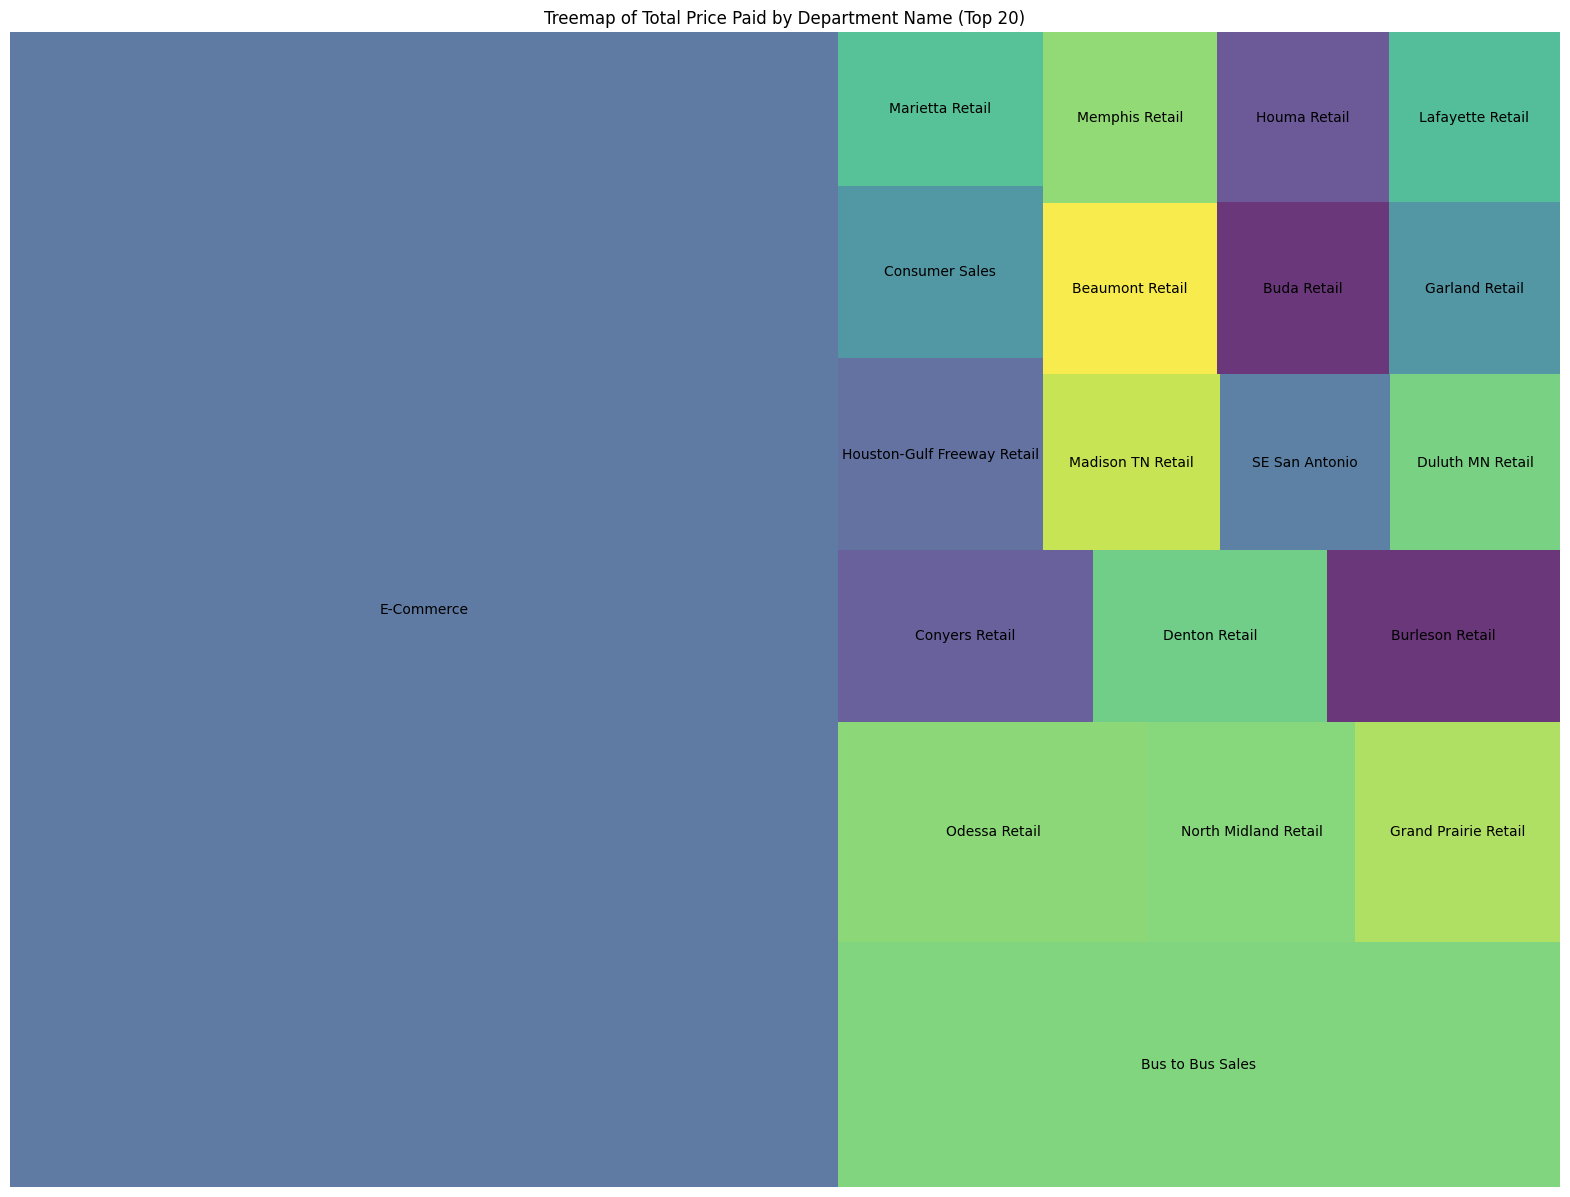

In [37]:
# Sort the data and select top N departments for better visualization if there are many departments
treemap_data = treemap_data.sort_values(by='Price Paid', ascending=False).head(20)
plt.figure(figsize=(20,15))
squarify.plot(sizes=treemap_data['Price Paid'], label=treemap_data['Dept Name'], alpha=.8)
plt.title('Treemap of Total Price Paid by Department Name (Top 20)')
plt.axis('off')
plt.show()

In [38]:
num_Sales_df=Sales_df.select_dtypes(include=['int64','float64'])
num_Sales_df

,Gold_Cust_ID,Dept ID,Price Paid,Units,Shipping Cost,DMCouponInd,Return_Ind
0,213,5611,6.99,1.0,11.171556,0,0
10,213,5611,179.99,1.0,11.171556,0,0
20,213,5611,14.99,1.0,11.171556,0,0
30,213,5611,3.49,1.0,11.171556,0,0
31,213,5611,11.99,1.0,11.171556,0,0
...,...,...,...,...,...,...,...
271130,37543211,5518,39.97,1.0,11.171556,0,0
271131,37544105,2191,1129.00,1.0,41.490000,0,0
271132,37545460,5513,1694.96,4.0,11.171556,0,0
271133,37545460,5513,1694.96,4.0,11.171556,1,0


## **Data Visualization on numerical columns**

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Gold_Cust_ID'),
  Text(2, 0, 'Dept ID'),
  Text(3, 0, 'Price Paid'),
  Text(4, 0, 'Units'),
  Text(5, 0, 'Shipping Cost'),
  Text(6, 0, 'DMCouponInd'),
  Text(7, 0, 'Return_Ind')])

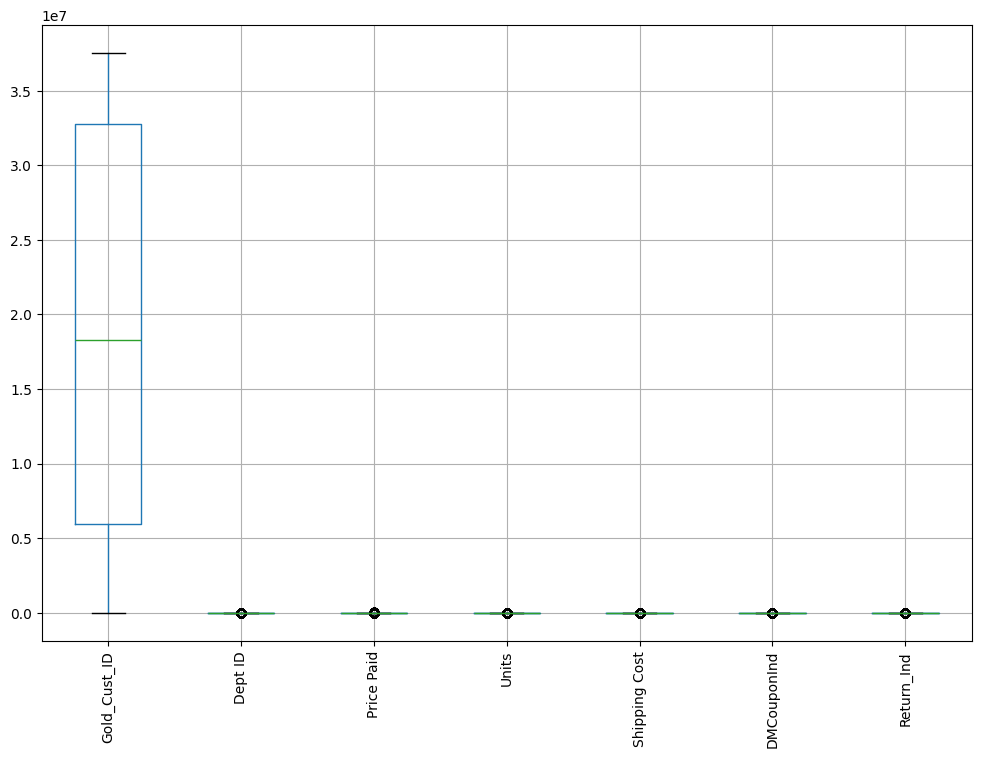

In [39]:
num_Sales_df.boxplot(figsize=(12,8))
plt.xticks(rotation=90)

<Axes: >

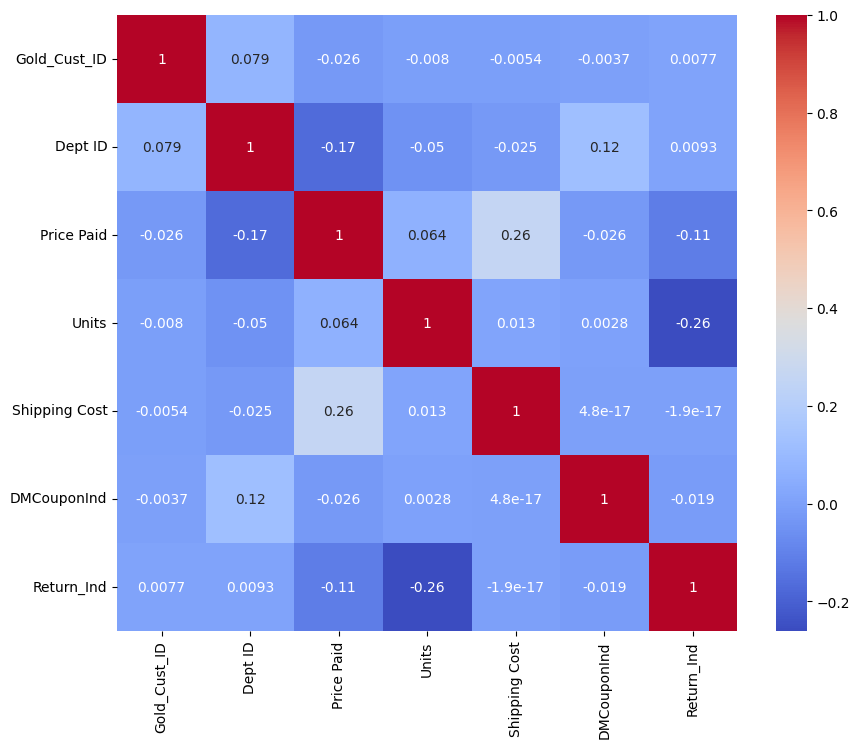

In [40]:
corr=num_Sales_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

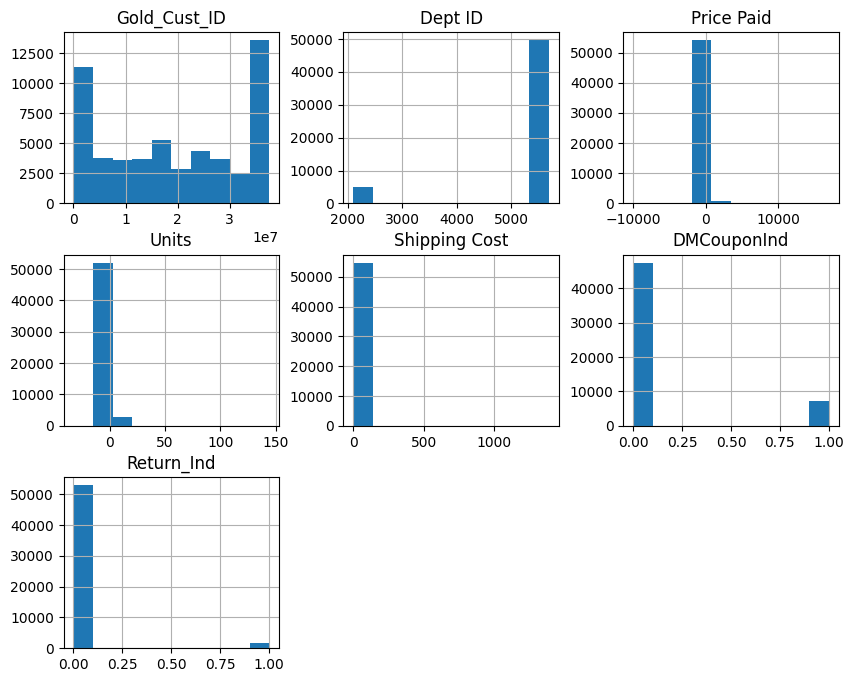

In [41]:
num_Sales_df.hist(figsize=(10,8))
plt.show()

## **Merged two Dataset with left join**

In [42]:
merged_df=Sales_df.merge(Dates_df, on='Gold_Cust_ID', how='left')
merged_df

,Gold_Cust_ID,Post_Cd,Tran_Dt,Dept ID,Dept Name,Division,Channel,Online Store,Itm_Id,Class Code,Class Name,Brand Name,Price Paid,Units,Shipping Cost,DMCouponInd,Return_Ind,DM Mail Date
0,213,344813463,2023-05-16,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,11.171556,0,0,2023-05-08
1,213,344813463,2023-05-16,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,11.171556,0,0,2024-09-09
2,213,344813463,2023-05-16,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,11.171556,0,0,2023-11-06
3,213,344813463,2023-05-16,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,11.171556,0,0,2024-04-08
4,213,344813463,2023-05-16,5611,Ocala Retail,Retail,Retail,/Not Applicable,18359,57,TRAILERS/TRAILER PARTS,/Not Applicable,6.99,1.0,11.171556,0,0,2025-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257648,37543211,273499366,2025-04-30,5518,Burlington Retail,Retail,Retail,/Not Applicable,111740,33,POWER TOOLS,/Not Applicable,39.97,1.0,11.171556,0,0,NaT
257649,37544105,321193400,2025-05-01,2191,E-Commerce,Direct,Internet,NTE.com,5864861,7,AUTOMOTIVE ACCESSORIES,/Not Applicable,1129.00,1.0,41.490000,0,0,NaT
257650,37545460,276042489,2025-05-01,5513,East Raleigh Retail,Retail,Retail,/Not Applicable,41911,7,AUTOMOTIVE ACCESSORIES,Northern Tool,1694.96,4.0,11.171556,0,0,NaT
257651,37545460,276042489,2025-05-01,5513,East Raleigh Retail,Retail,Retail,/Not Applicable,41911,7,AUTOMOTIVE ACCESSORIES,Northern Tool,1694.96,4.0,11.171556,1,0,NaT


In [43]:
merged_df.dtypes

,0
Gold_Cust_ID,int64
Post_Cd,object
Tran_Dt,datetime64[ns]
Dept ID,int64
Dept Name,object
Division,object
Channel,object
Online Store,object
Itm_Id,object
Class Code,object


## **Data Cleaning on Merged Dataset**

In [44]:
merged_df.isnull().sum()


,0
Gold_Cust_ID,0
Post_Cd,0
Tran_Dt,0
Dept ID,0
Dept Name,0
Division,0
Channel,0
Online Store,0
Itm_Id,0
Class Code,0


In [45]:
merged_df.duplicated().sum()

np.int64(7035)

In [46]:
merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)

### **It calculates if a purchase happened 30 days before or after the DM date**

In [47]:
from datetime import timedelta

merged_df['Days_From_DM'] = (merged_df['Tran_Dt'] - merged_df['DM Mail Date']).dt.days
merged_df['Pre_DM'] = merged_df['Days_From_DM'].between(-30, -1)
merged_df['Post_DM'] = merged_df['Days_From_DM'].between(0, 30)

## It creates customer-level features:

* Spend and units before/after DM

* Average coupon use rate

* Ratio of online purchases

In [48]:
# Aggregate spend
pre_spend = merged_df[merged_df['Pre_DM']].groupby('Gold_Cust_ID')['Price Paid'].sum().rename('Spend_Before')
post_spend = merged_df[merged_df['Post_DM']].groupby('Gold_Cust_ID')['Price Paid'].sum().rename('Spend_After')

# Units
pre_units = merged_df[merged_df['Pre_DM']].groupby('Gold_Cust_ID')['Units'].sum().rename('Units_Before')
post_units = merged_df[merged_df['Post_DM']].groupby('Gold_Cust_ID')['Units'].sum().rename('Units_After')

# Coupon usage
coupon_rate = merged_df.groupby('Gold_Cust_ID')['DMCouponInd'].mean().rename('Coupon_Usage_Rate')

# Online Store to 1 and '/Not Applicable' to 0
merged_df['Is_Online'] = merged_df['Online Store'].apply(lambda x: 0 if x == '/Not Applicable' else 1)

# calculate the proportion of online orders per customer
channel_rate = merged_df.groupby('Gold_Cust_ID')['Is_Online'].mean().rename('Online_Store_Rate')


### Create new Table called Feature with Customer level

In [49]:
features = pre_spend.to_frame().join([
    post_spend, pre_units, post_units, coupon_rate, channel_rate
]).fillna(0).reset_index()
features

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate
0,213,214.45,243.40,5.0,10.0,0.000000,0.000000
1,801,61.98,0.00,2.0,0.0,0.000000,0.000000
2,5038,208.22,0.00,4.0,0.0,0.000000,0.000000
3,16010,234.97,679.98,3.0,2.0,0.000000,0.200000
4,19413,1884.91,0.00,5.0,0.0,0.071429,0.000000
...,...,...,...,...,...,...,...
1598,35723689,102.96,55.23,4.0,7.0,0.000000,0.000000
1599,35766496,142.18,235.35,2.0,8.0,0.727273,0.090909
1600,35947203,8.77,0.00,3.0,0.0,0.000000,0.000000
1601,36054508,104.97,124.98,3.0,2.0,0.000000,0.894737


In [50]:
def label_influence(row):
    if row['Spend_Before'] == 0 and row['Spend_After'] > 0:
        return 1
    if row['Spend_After'] > 1.2 * row['Spend_Before']:
        return 1
    return 0

features['Target'] = features.apply(label_influence, axis=1)
features

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target
0,213,214.45,243.40,5.0,10.0,0.000000,0.000000,0
1,801,61.98,0.00,2.0,0.0,0.000000,0.000000,0
2,5038,208.22,0.00,4.0,0.0,0.000000,0.000000,0
3,16010,234.97,679.98,3.0,2.0,0.000000,0.200000,1
4,19413,1884.91,0.00,5.0,0.0,0.071429,0.000000,0
...,...,...,...,...,...,...,...,...
1598,35723689,102.96,55.23,4.0,7.0,0.000000,0.000000,0
1599,35766496,142.18,235.35,2.0,8.0,0.727273,0.090909,1
1600,35947203,8.77,0.00,3.0,0.0,0.000000,0.000000,0
1601,36054508,104.97,124.98,3.0,2.0,0.000000,0.894737,0


## **Exploratory Data Analysis on features table**

In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gold_Cust_ID       1603 non-null   int64  
 1   Spend_Before       1603 non-null   float64
 2   Spend_After        1603 non-null   float64
 3   Units_Before       1603 non-null   float64
 4   Units_After        1603 non-null   float64
 5   Coupon_Usage_Rate  1603 non-null   float64
 6   Online_Store_Rate  1603 non-null   float64
 7   Target             1603 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 100.3 KB


In [52]:
features.describe()

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target
count,1.603000e+03,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000
mean,1.299954e+07,322.046787,234.440387,6.205552,5.471616,0.139728,0.101218,0.262009
std,1.052069e+07,801.702959,609.684380,14.367773,15.898701,0.269082,0.268180,0.439865
min,2.130000e+02,-399.990000,-1400.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000
25%,2.586444e+06,36.955000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.105064e+07,105.930000,37.040000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,2.243449e+07,310.925000,214.725000,6.000000,6.000000,0.166667,0.000000,1.000000
max,3.692455e+07,20482.020000,10569.480000,410.000000,449.000000,1.000000,1.000000,1.000000


In [53]:
features.axes

[RangeIndex(start=0, stop=1603, step=1),
 Index(['Gold_Cust_ID', 'Spend_Before', 'Spend_After', 'Units_Before',
        'Units_After', 'Coupon_Usage_Rate', 'Online_Store_Rate', 'Target'],
       dtype='object')]

In [54]:
features.nunique()

,0
Gold_Cust_ID,1603
Spend_Before,1234
Spend_After,867
Units_Before,60
Units_After,62
Coupon_Usage_Rate,169
Online_Store_Rate,80
Target,2


## **Data Cleaning on features table**

In [55]:
features.isnull().sum()

,0
Gold_Cust_ID,0
Spend_Before,0
Spend_After,0
Units_Before,0
Units_After,0
Coupon_Usage_Rate,0
Online_Store_Rate,0
Target,0


In [56]:
features.duplicated().sum()

np.int64(0)

### **Data Visualization on feature table**

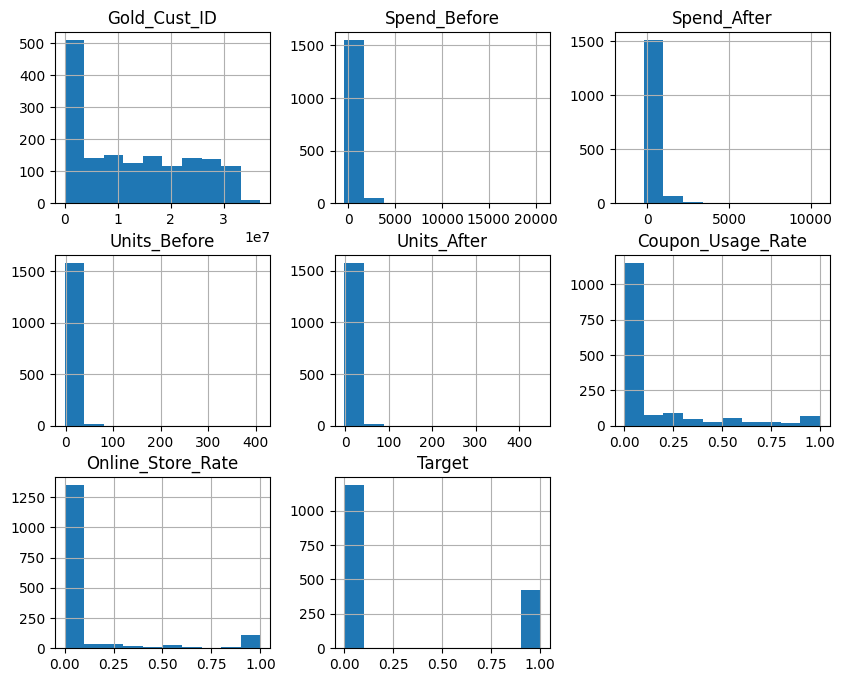

In [57]:
features.hist(figsize=(10,8))
plt.show()

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Gold_Cust_ID'),
  Text(2, 0, 'Spend_Before'),
  Text(3, 0, 'Spend_After'),
  Text(4, 0, 'Units_Before'),
  Text(5, 0, 'Units_After'),
  Text(6, 0, 'Coupon_Usage_Rate'),
  Text(7, 0, 'Online_Store_Rate'),
  Text(8, 0, 'Target')])

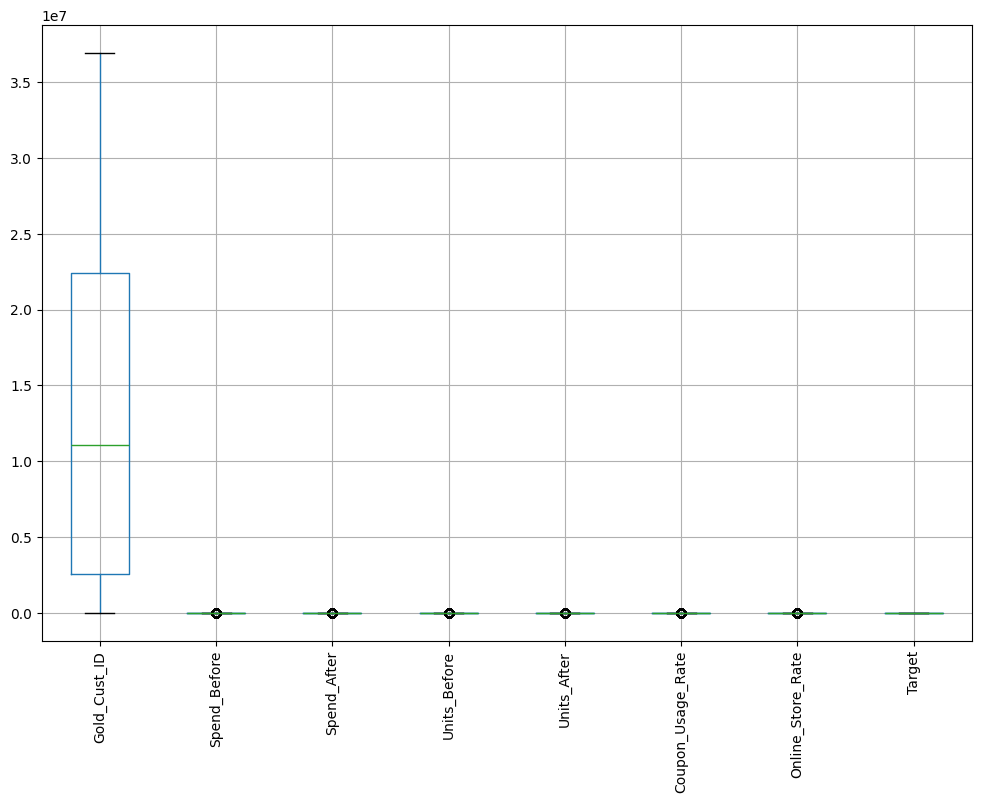

In [58]:
features.boxplot(figsize=(12,8))
plt.xticks(rotation=90)

<Axes: >

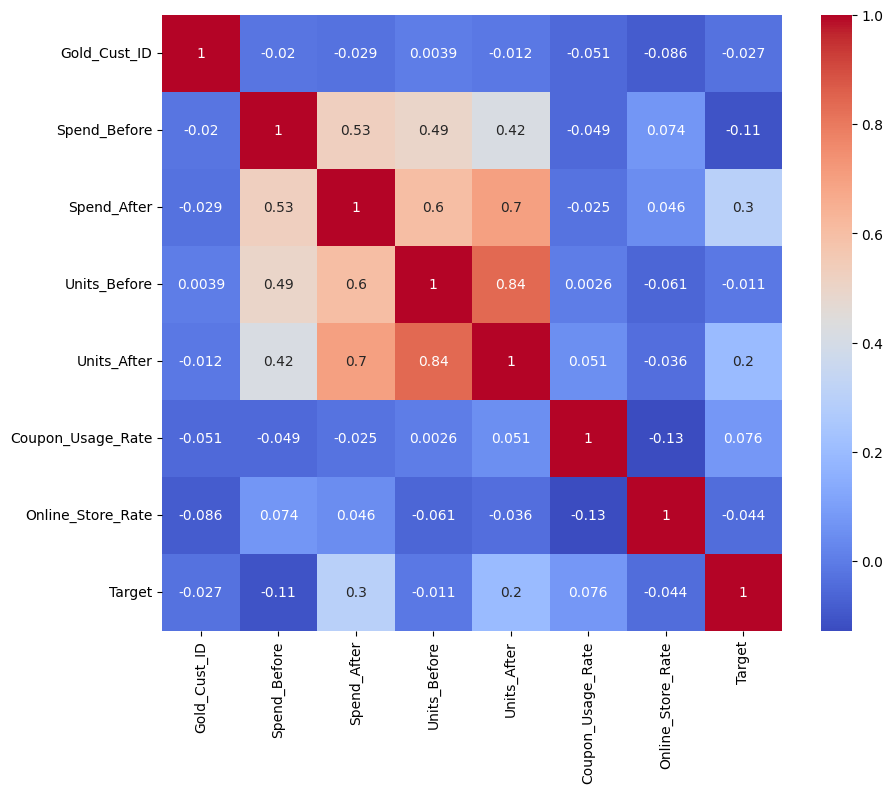

In [59]:
corr=features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

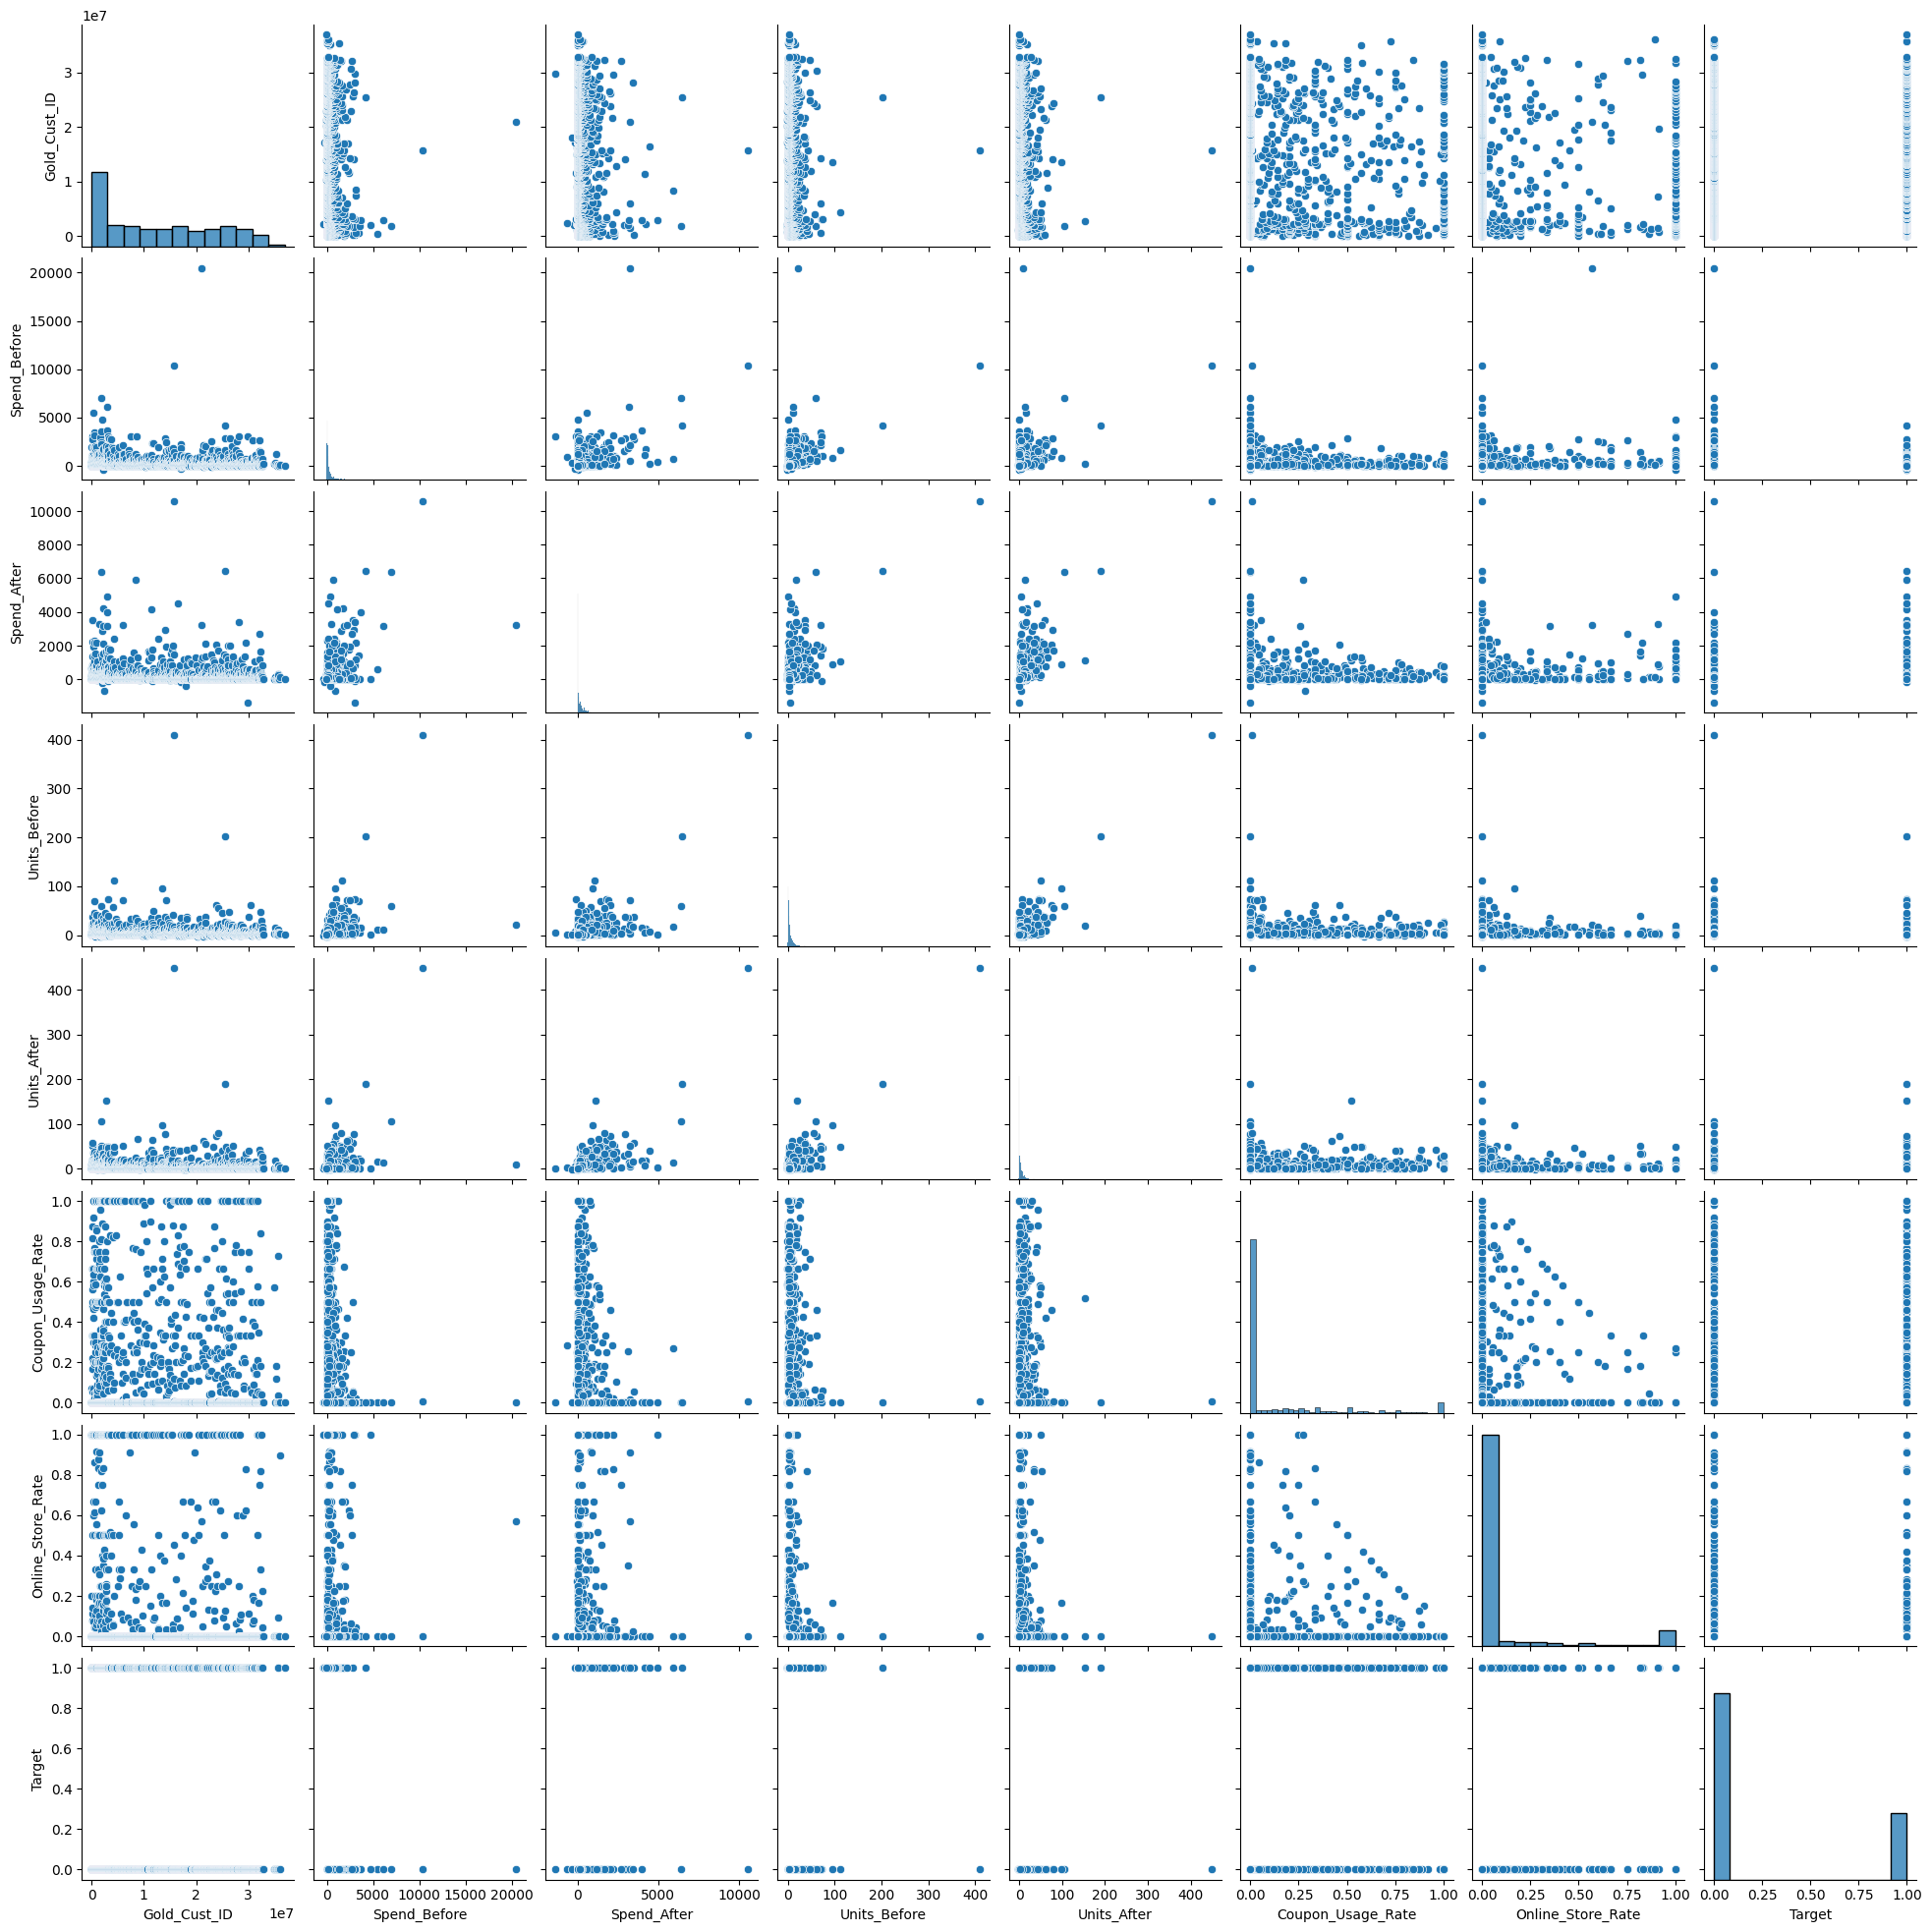

In [60]:
sns.pairplot(features)
plt.show()

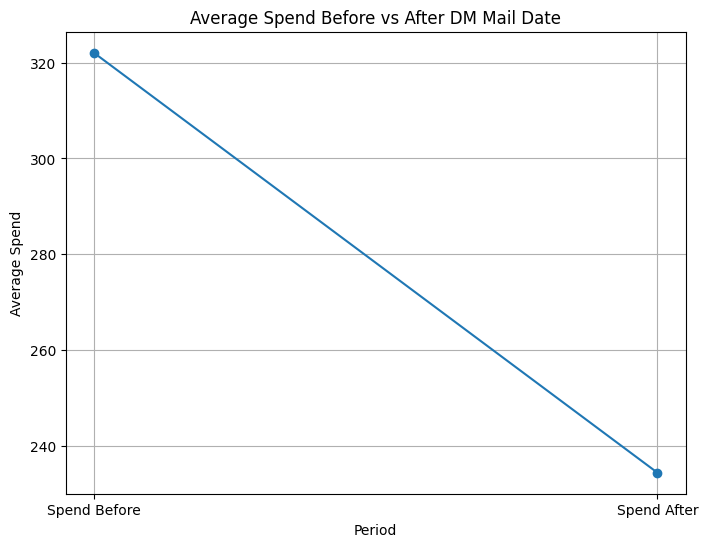

In [61]:
# A direct line plot between Spend_Before and Spend_After for each customer might be messy.
# A better approach might be to compare the average spend in the two periods.
average_spend = features[['Spend_Before', 'Spend_After']].mean()

plt.figure(figsize=(8, 6))
average_spend.plot(kind='line', marker='o')
plt.title('Average Spend Before vs After DM Mail Date')
plt.xlabel('Period')
plt.ylabel('Average Spend')
plt.xticks(ticks=[0, 1], labels=['Spend Before', 'Spend After'])
plt.grid(True)
plt.show()

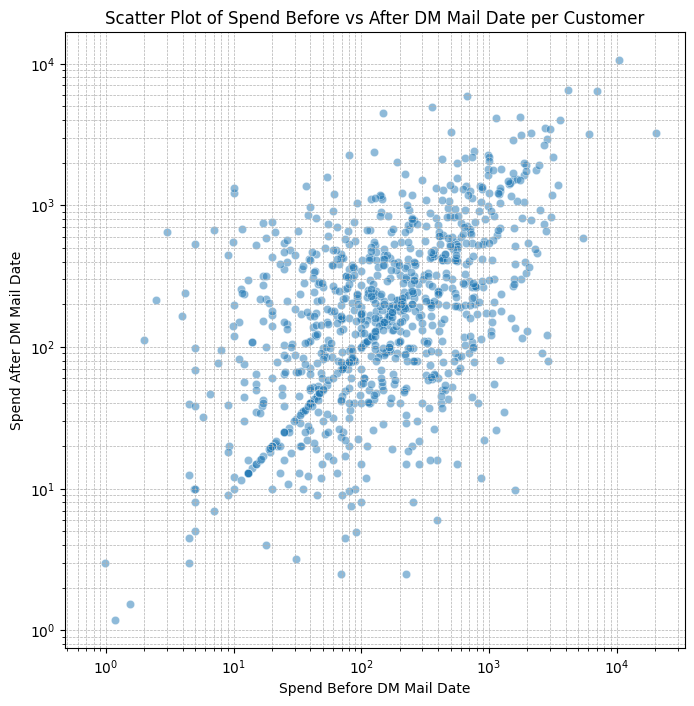

In [62]:
# Alternatively, we could plot a scatter plot if we want to see the relationship per customer
plt.figure(figsize=(8, 8))
sns.scatterplot(data=features, x='Spend_Before', y='Spend_After', alpha=0.5)
plt.title('Scatter Plot of Spend Before vs After DM Mail Date per Customer')
plt.xlabel('Spend Before DM Mail Date')
plt.ylabel('Spend After DM Mail Date')
plt.xscale('log') # Using log scale can help visualize data with wide range
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## **Model Building on features table**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = features.drop(columns=['Gold_Cust_ID', 'Target'])
y = features['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]



In [65]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]



In [66]:

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]



## **Report of Model building wkith classification report**

In [67]:
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': (y_pred_lr, y_prob_lr),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'Decision Tree': (y_pred_dt, y_prob_dt),
    'Gradient Boosting': (y_pred_gb, y_prob_gb)
}

results = {}

for name, (y_pred, y_prob) in models.items():
    results[name] = {
        'report': classification_report(y_test, y_pred, output_dict=True),
        'auc': roc_auc_score(y_test, y_prob)
    }

    print(f"===== {name} =====")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {results[name]['auc']:.4f}\n")



===== Logistic Regression =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       355
           1       0.97      0.99      0.98       126

    accuracy                           0.99       481
   macro avg       0.98      0.99      0.99       481
weighted avg       0.99      0.99      0.99       481

AUC Score: 0.9999

===== Random Forest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       355
           1       0.97      0.89      0.93       126

    accuracy                           0.96       481
   macro avg       0.96      0.94      0.95       481
weighted avg       0.96      0.96      0.96       481

AUC Score: 0.9871

===== Decision Tree =====
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       355
           1       0.91      0.92      0.92   

## **Model Comparison Summary**

In [68]:
# Summarize key metrics
summary_data = []
for model_name, model_results in results.items():
    report = model_results['report']
    summary_data.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision (Weighted Avg)': report['weighted avg']['precision'],
        'Recall (Weighted Avg)': report['weighted avg']['recall'],
        'F1-Score (Weighted Avg)': report['weighted avg']['f1-score'],
        'AUC Score': model_results['auc']
    })

summary_df = pd.DataFrame(summary_data)
print("===== Model Comparison Summary =====")
display(summary_df)

===== Model Comparison Summary =====


,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg),AUC Score
0,Logistic Regression,0.989605,0.989781,0.989605,0.989644,0.999866
1,Random Forest,0.962578,0.962658,0.962578,0.962065,0.987112
2,Decision Tree,0.956341,0.956462,0.956341,0.956396,0.944825
3,Gradient Boosting,0.962578,0.962356,0.962578,0.962381,0.991639


## **Visualize AUC scores**


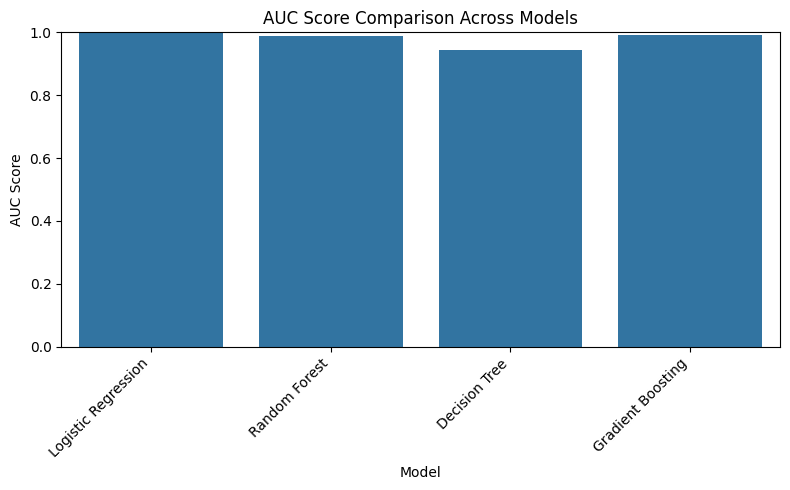

In [69]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='AUC Score', data=summary_df)
plt.title('AUC Score Comparison Across Models')
plt.ylabel('AUC Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Influence_probability with logistics regression**

In [70]:
features['Influence_Probability'] = lr_model.predict_proba(X)[:, 1]
features

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target,Influence_Probability
0,213,214.45,243.40,5.0,10.0,0.000000,0.000000,0,6.966567e-07
1,801,61.98,0.00,2.0,0.0,0.000000,0.000000,0,2.166450e-44
2,5038,208.22,0.00,4.0,0.0,0.000000,0.000000,0,6.995317e-145
3,16010,234.97,679.98,3.0,2.0,0.000000,0.200000,1,1.000000e+00
4,19413,1884.91,0.00,5.0,0.0,0.071429,0.000000,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...
1598,35723689,102.96,55.23,4.0,7.0,0.000000,0.000000,0,5.877527e-39
1599,35766496,142.18,235.35,2.0,8.0,0.727273,0.090909,1,1.000000e+00
1600,35947203,8.77,0.00,3.0,0.0,0.000000,0.000000,0,1.146103e-07
1601,36054508,104.97,124.98,3.0,2.0,0.000000,0.894737,0,1.098346e-01


In [71]:
pd.options.display.float_format = '{:.6f}'.format
display(features)

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target,Influence_Probability
0,213,214.450000,243.400000,5.000000,10.000000,0.000000,0.000000,0,0.000001
1,801,61.980000,0.000000,2.000000,0.000000,0.000000,0.000000,0,0.000000
2,5038,208.220000,0.000000,4.000000,0.000000,0.000000,0.000000,0,0.000000
3,16010,234.970000,679.980000,3.000000,2.000000,0.000000,0.200000,1,1.000000
4,19413,1884.910000,0.000000,5.000000,0.000000,0.071429,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...
1598,35723689,102.960000,55.230000,4.000000,7.000000,0.000000,0.000000,0,0.000000
1599,35766496,142.180000,235.350000,2.000000,8.000000,0.727273,0.090909,1,1.000000
1600,35947203,8.770000,0.000000,3.000000,0.000000,0.000000,0.000000,0,0.000000
1601,36054508,104.970000,124.980000,3.000000,2.000000,0.000000,0.894737,0,0.109835


### **few visualization on results**

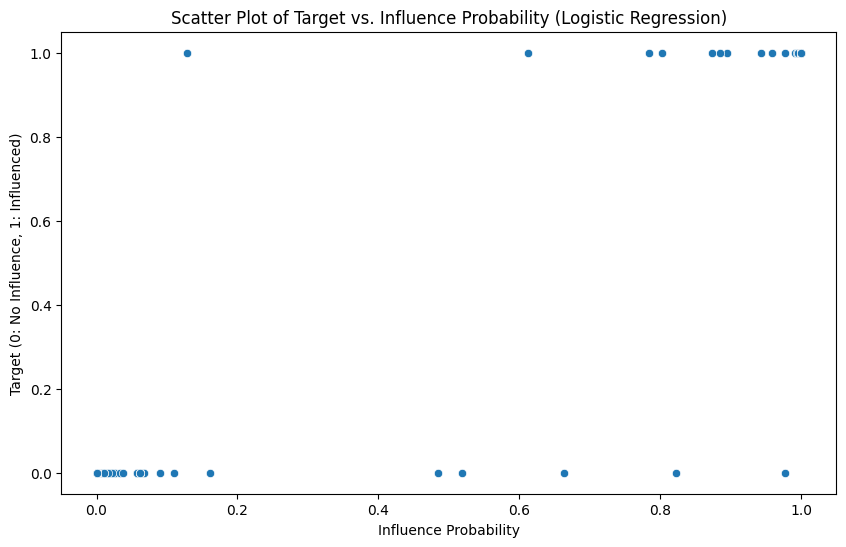

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Influence_Probability', y='Target')
plt.title('Scatter Plot of Target vs. Influence Probability (Logistic Regression)')
plt.xlabel('Influence Probability')
plt.ylabel('Target (0: No Influence, 1: Influenced)')
plt.show()

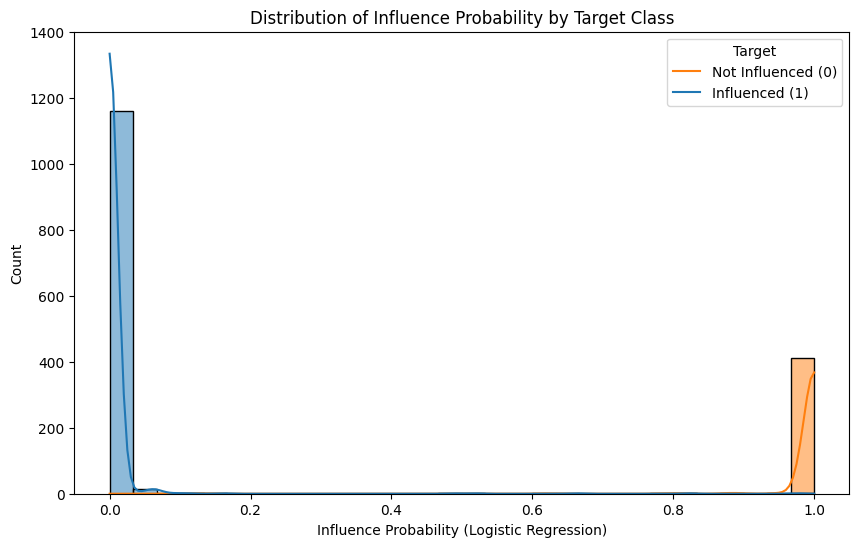

In [73]:
# Distribution of Influence Probability by Target Class
plt.figure(figsize=(10, 6))
sns.histplot(data=features, x='Influence_Probability', hue='Target', kde=True, bins=30)
plt.title('Distribution of Influence Probability by Target Class')
plt.xlabel('Influence Probability (Logistic Regression)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Not Influenced (0)', 'Influenced (1)'])
plt.show()

### **Hyperparameter tuning(Random Search cv) with gradient Boosting**

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),  # Sample from 100 to 300
    'learning_rate': uniform(0.01, 0.2), # Sample from 0.01 to 0.2
    'max_depth': randint(3, 6), # Sample from 3 to 6
    'min_samples_split': randint(2, 20), # Sample from 2 to 20
    'min_samples_leaf': randint(1, 10) # Sample from 1 to 10
}

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)


# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation AUC score: {best_score:.4f}")

# Evaluate the best model on the test set
best_gb_model = random_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)
y_prob_gb_tuned = best_gb_model.predict_proba(X_test)[:, 1]

print("\n===== Tuned Gradient Boosting (Randomized Search) =====")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_tuned))
print(f"AUC Score: {roc_auc_score(y_test, y_prob_gb_tuned):.4f}\n")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found: {'learning_rate': np.float64(0.029082023298082266), 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 198}
Best cross-validation AUC score: 0.9933

===== Tuned Gradient Boosting (Randomized Search) =====
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       355
           1       0.95      0.92      0.94       126

    accuracy                           0.97       481
   macro avg       0.96      0.95      0.96       481
weighted avg       0.97      0.97      0.97       481

AUC Score: 0.9935



### **Model Comparison Summary (Including Tuned GB)**

In [75]:

import pandas as pd
import matplotlib.pyplot as plt
# Compare the tuned GB model with the original models
summary_data_tuned = summary_data.copy() # Start with the original summary
summary_data_tuned.append({
    'Model': 'Gradient Boosting (Tuned)',
    'Accuracy': classification_report(y_test, y_pred_gb_tuned, output_dict=True)['accuracy'],
    'Precision (Weighted Avg)': classification_report(y_test, y_pred_gb_tuned, output_dict=True)['weighted avg']['precision'],
    'Recall (Weighted Avg)': classification_report(y_test, y_pred_gb_tuned, output_dict=True)['weighted avg']['recall'],
    'F1-Score (Weighted Avg)': classification_report(y_test, y_pred_gb_tuned, output_dict=True)['weighted avg']['f1-score'],
    'AUC Score': roc_auc_score(y_test, y_prob_gb_tuned)
})

summary_df_tuned = pd.DataFrame(summary_data_tuned)
print("===== Model Comparison Summary (Including Tuned GB) =====")
display(summary_df_tuned)

===== Model Comparison Summary (Including Tuned GB) =====


,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg),AUC Score
0,Logistic Regression,0.989605,0.989781,0.989605,0.989644,0.999866
1,Random Forest,0.962578,0.962658,0.962578,0.962065,0.987112
2,Decision Tree,0.956341,0.956462,0.956341,0.956396,0.944825
3,Gradient Boosting,0.962578,0.962356,0.962578,0.962381,0.991639
4,Gradient Boosting (Tuned),0.966736,0.966559,0.966736,0.966561,0.993472


### **AUC Score Comparison Across Models**

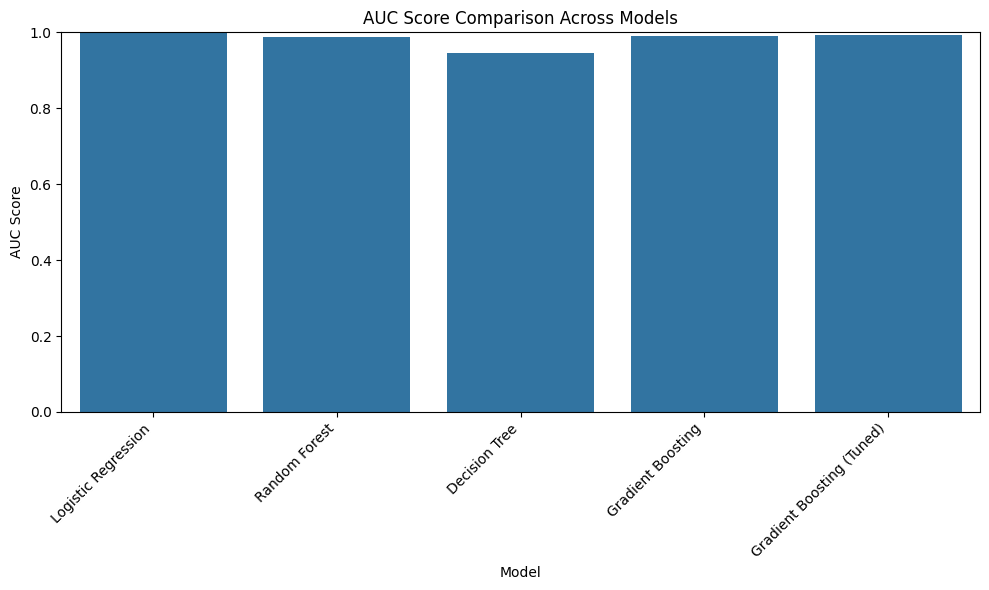

In [76]:
# Visualize AUC scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC Score', data=summary_df_tuned)
plt.title('AUC Score Comparison Across Models')
plt.ylabel('AUC Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Influence_Probability on logistics regression and gradient boost with tuning**

In [77]:
features['Influence_Probability'] = lr_model.predict_proba(X)[:, 1]
features

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target,Influence_Probability
0,213,214.450000,243.400000,5.000000,10.000000,0.000000,0.000000,0,0.000001
1,801,61.980000,0.000000,2.000000,0.000000,0.000000,0.000000,0,0.000000
2,5038,208.220000,0.000000,4.000000,0.000000,0.000000,0.000000,0,0.000000
3,16010,234.970000,679.980000,3.000000,2.000000,0.000000,0.200000,1,1.000000
4,19413,1884.910000,0.000000,5.000000,0.000000,0.071429,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...
1598,35723689,102.960000,55.230000,4.000000,7.000000,0.000000,0.000000,0,0.000000
1599,35766496,142.180000,235.350000,2.000000,8.000000,0.727273,0.090909,1,1.000000
1600,35947203,8.770000,0.000000,3.000000,0.000000,0.000000,0.000000,0,0.000000
1601,36054508,104.970000,124.980000,3.000000,2.000000,0.000000,0.894737,0,0.109835


In [78]:
features['Influence_Probability_GB_Tuned'] = best_gb_model.predict_proba(X)[:, 1]
display(features)

,Gold_Cust_ID,Spend_Before,Spend_After,Units_Before,Units_After,Coupon_Usage_Rate,Online_Store_Rate,Target,Influence_Probability,Influence_Probability_GB_Tuned
0,213,214.450000,243.400000,5.000000,10.000000,0.000000,0.000000,0,0.000001,0.093891
1,801,61.980000,0.000000,2.000000,0.000000,0.000000,0.000000,0,0.000000,0.002597
2,5038,208.220000,0.000000,4.000000,0.000000,0.000000,0.000000,0,0.000000,0.001972
3,16010,234.970000,679.980000,3.000000,2.000000,0.000000,0.200000,1,1.000000,0.983393
4,19413,1884.910000,0.000000,5.000000,0.000000,0.071429,0.000000,0,0.000000,0.001048
...,...,...,...,...,...,...,...,...,...,...
1598,35723689,102.960000,55.230000,4.000000,7.000000,0.000000,0.000000,0,0.000000,0.013048
1599,35766496,142.180000,235.350000,2.000000,8.000000,0.727273,0.090909,1,1.000000,0.972016
1600,35947203,8.770000,0.000000,3.000000,0.000000,0.000000,0.000000,0,0.000000,0.004198
1601,36054508,104.970000,124.980000,3.000000,2.000000,0.000000,0.894737,0,0.109835,0.026533


## **few more visualization on Influence_Probability**

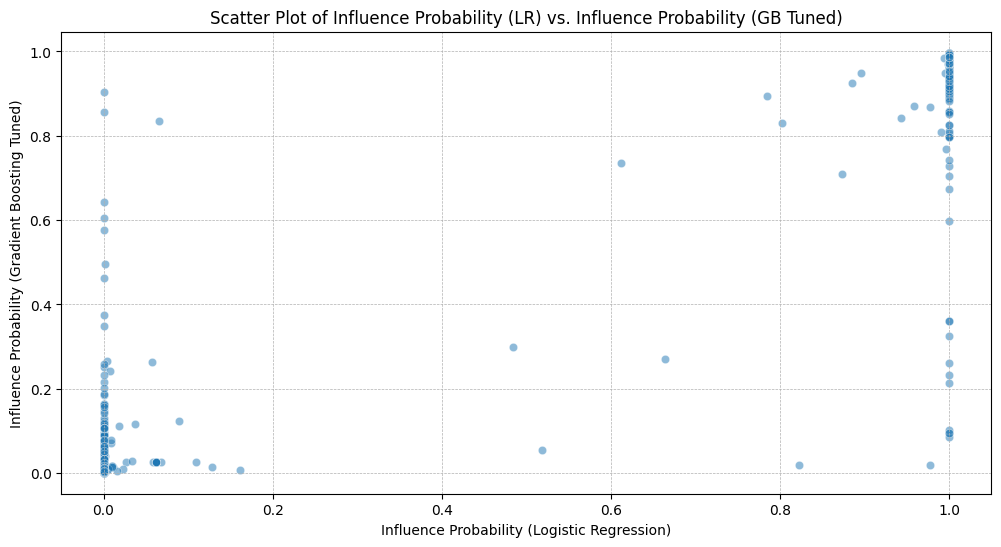

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.scatterplot(data=features, x='Influence_Probability', y='Influence_Probability_GB_Tuned', alpha=0.5)
plt.title('Scatter Plot of Influence Probability (LR) vs. Influence Probability (GB Tuned)')
plt.xlabel('Influence Probability (Logistic Regression)')
plt.ylabel('Influence Probability (Gradient Boosting Tuned)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

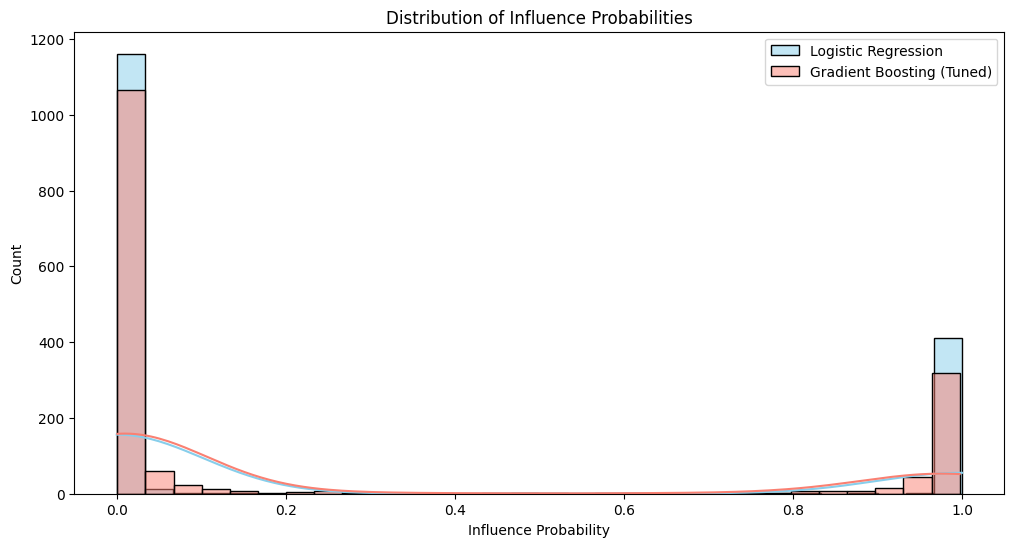

In [80]:
# Distribution of both influence probabilities
plt.figure(figsize=(12, 6))
sns.histplot(data=features, x='Influence_Probability', label='Logistic Regression', kde=True, bins=30, color='skyblue')
sns.histplot(data=features, x='Influence_Probability_GB_Tuned', label='Gradient Boosting (Tuned)', kde=True, bins=30, color='salmon')
plt.title('Distribution of Influence Probabilities')
plt.xlabel('Influence Probability')
plt.ylabel('Count')
plt.legend()
plt.show()

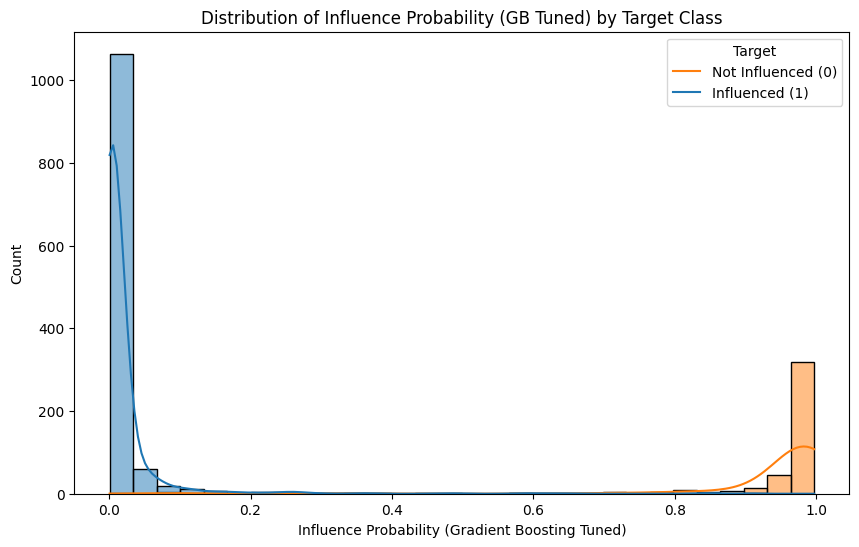

In [81]:
# Distribution of Influence Probability (GB Tuned) by Target Class
plt.figure(figsize=(10, 6))
sns.histplot(data=features, x='Influence_Probability_GB_Tuned', hue='Target', kde=True, bins=30)
plt.title('Distribution of Influence Probability (GB Tuned) by Target Class')
plt.xlabel('Influence Probability (Gradient Boosting Tuned)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Not Influenced (0)', 'Influenced (1)'])
plt.show()

### **Compare correlations of the two probabilities with the target**


In [82]:
print("Correlation of Influence Probability (LR) with Target:", features['Influence_Probability'].corr(features['Target']))
print("Correlation of Influence Probability (GB Tuned) with Target:", features['Influence_Probability_GB_Tuned'].corr(features['Target']))

Correlation of Influence Probability (LR) with Target: 0.993999256156432
Correlation of Influence Probability (GB Tuned) with Target: 0.9770610384972637


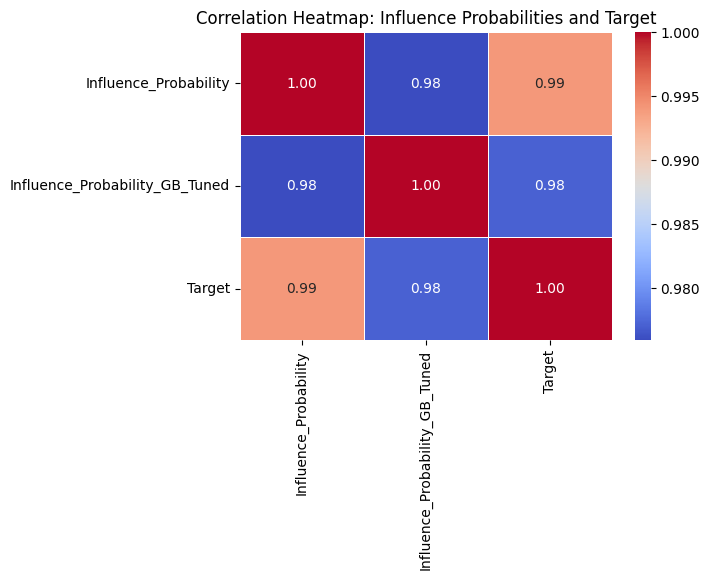

In [83]:
# Visualize the correlations using a heatmap for selected columns
correlation_matrix = features[['Influence_Probability', 'Influence_Probability_GB_Tuned', 'Target']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Influence Probabilities and Target')
plt.show()